# 1. Preparation

## 1.1. Library Upload

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Uploading Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sklearn
import xgboost as xgb
import tensorflow as tf
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from folium.plugins import HeatMap

C:\Users\ahska\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1.2. Data Upload

In [3]:
# Uploading the dataset
data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')
data

C:\Users\ahska\AppData\Local\Temp\ipykernel_37632\3319388646.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,PAST SALE,April-21-2020,Single Family Residential,7135 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",950000,4,...,1.200146,2.399690,1.506827,3.583604,2.246205,0.496974,4.826767,0.641446,2.702233,6.853520
16660,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16661,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16662,PAST SALE,November-9-2022,Single Family Residential,8150 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",1150000,4,...,0.875637,4.332201,2.193801,4.861157,0.999305,0.446238,3.915165,0.612154,2.545826,9.123077


# 2. Data Preprocessing

## 2.1. Data Check

In [4]:
# Displaying information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [5]:
# Checking for null values/missing values
data.isnull().sum()

SALE TYPE                                  0
SOLD DATE                               2917
PROPERTY TYPE                              0
ADDRESS                                    0
CITY                                       0
STATE OR PROVINCE                          0
ZIP OR POSTAL CODE                         0
NEIGHBORHOOD                               0
PRICE                                      0
BEDS                                       0
BATHS                                      0
LOCATION                                   0
SQUARE FEET                                0
LOT SIZE                                2610
YEAR BUILT                                 0
DAYS ON MARKET                         14155
$/SQUARE FEET                              0
HOA/MONTH                              12109
STATUS                                  1017
NEXT OPEN HOUSE START TIME             16254
NEXT OPEN HOUSE END TIME               16254
URL                                        0
SOURCE    

In [6]:
columns_to_drop = ['SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 
                   'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 
                   'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 
                   'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long']

# Drop columns that exist in the DataFrame
data_check = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [7]:
# Checking the statistics of the data
data_check.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,gas_station_accessibility,parking_accessibility,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
count,1.666400e+04,16664.00000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,...,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000
mean,1.204680e+06,3.06325,2.285241,1943.243639,1972.158125,1.193679,13.715487,0.062136,21.232271,0.005389,...,5.151770,9.039253,5.808909,26.027815,3.625721,1.742096,5.111753,0.477210,4.854828,23.638285
std,1.463403e+06,1.28549,1.047168,1075.379249,39.464822,0.914335,37.208423,0.225246,11.841349,0.050845,...,9.341222,13.564628,5.094240,39.461253,5.388173,5.627861,3.778865,0.589981,5.017696,20.534118
min,6.170600e+04,1.00000,1.000000,142.000000,1889.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.270000e+05,2.00000,2.000000,1220.000000,1940.000000,0.394569,1.187634,0.000000,14.381177,0.000000,...,0.735626,2.620514,1.967434,6.526101,0.768549,0.000000,2.216129,0.078605,1.943787,9.092470
50%,8.850000e+05,3.00000,2.000000,1720.000000,1973.000000,1.087226,3.061848,0.000000,20.179976,0.000000,...,2.180284,5.126611,4.575636,14.473039,1.964593,0.255883,4.539812,0.359653,3.407789,19.107166
75%,1.295500e+06,4.00000,3.000000,2410.000000,2011.000000,1.873552,7.709890,0.000000,24.519093,0.000000,...,5.127719,8.961904,8.200062,27.064461,4.302296,0.953896,6.947047,0.653980,5.559859,32.117487
max,6.710000e+07,22.00000,23.000000,20587.000000,2025.000000,3.940469,259.771887,3.326475,87.113944,0.885319,...,66.753270,101.198643,28.019075,277.198990,41.163393,62.243117,20.745593,4.827632,34.491707,126.337807


## 2.2. Feature Engineering

### 2.2.1. "Year Built" Feature Transformation

In [8]:
# Creating 'age' as a new variable by extracting it from the 'yr_built' variable
data.rename(columns={'YEAR BUILT':'AGE'},inplace=True)
data['AGE'] = 2024 - data['AGE']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [10]:
# Ensuring conversion of categorical variable is successful
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


### 2.2.2. Selecting Features

In [11]:
def filter_features_by_categories(data, core_features, measure_type, categories):
    """
    Filter DataFrame columns based on measurement type and a list of categories.
    
    Parameters:
    - data: pandas DataFrame.
    - core_features: list of strings, core columns to retain.
    - measure_type: string, measurement type (e.g., 'accessibility', 'density').
    - categories: list of strings, categories to focus on (e.g., ['transportation', 'health']).
    
    Returns:
    - DataFrame with filtered features.
    """
    # Initialize an empty list to store matched features
    measured_features = []
    
    # Loop through each category and collect features that match the measurement type and category
    for category in categories:
        pattern = f'{category}_{measure_type}'
        category_features = [col for col in data.columns if pd.Series(col).str.contains(pattern, regex=True).any()]
        measured_features.extend(category_features)
    
    # Combine core features with measured features
    features_to_keep = core_features + measured_features
    filtered_data = data[features_to_keep].copy()
    
    return filtered_data

# Example usage
core_features = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'AGE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long']  # Add more as needed
measure_type = 'accessibility'  # or 'density'
categories = ['airport', 'bus_station', 'ferry_terminal', 'light_rail_station', 'train_station', 'transit_station', 'transporation_others', 'school', 'park', 'hospital']  # Can include multiple categories

# Assuming 'data_1' is your DataFrame
filtered_data = filter_features_by_categories(data, core_features, measure_type, categories)

In [12]:
# Checking the statistics of the data
filtered_data

,PRICE,BEDS,BATHS,SQUARE FEET,AGE,SALE TYPE,PROPERTY TYPE,SOLD DATE,ADDRESS,CITY,...,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,light_rail_station_accessibility,train_station_accessibility,transit_station_accessibility,preschool_accessibility,school_accessibility,park_accessibility,hospital_accessibility
0,2700000,2,2.5,3240,26,PAST SALE,Single Family Residential,November-3-2023,443 11th Ave W,Kirkland,...,0.0,8.922428,0.0,0.0,0.0,11.228703,0.532412,3.987060,12.862183,0.274124
1,1998000,4,2.5,1830,48,PAST SALE,Single Family Residential,June-30-2023,2817 88th Ave NE,Hunts Point,...,0.0,3.017447,0.0,0.0,0.0,5.266543,0.000000,1.077636,2.937513,0.000000
2,5498000,4,5.5,5320,8,PAST SALE,Single Family Residential,July-21-2023,1008 88th Ave NE,Bellevue,...,0.0,5.718543,0.0,0.0,0.0,6.509344,0.105568,3.473282,5.223794,0.712440
3,10500000,5,4.5,4930,42,PAST SALE,Single Family Residential,January-27-2023,1520 90th Pl NE,Clyde Hill,...,0.0,5.890668,0.0,0.0,0.0,8.788340,0.204998,4.339838,2.771618,0.573254
4,8688000,5,6.0,7058,1,MLS Listing,Single Family Residential,NaN,8830 NE 28th St,Clyde Hill,...,0.0,3.283704,0.0,0.0,0.0,6.316637,0.000000,1.442196,2.557829,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,950000,4,2.0,1810,98,PAST SALE,Single Family Residential,April-21-2020,7135 32nd Ave SW,Seattle,...,0.0,23.123222,0.0,0.0,0.0,16.194409,0.868458,7.887527,14.481983,0.496974
16660,775000,3,3.0,1970,100,PAST SALE,Single Family Residential,July-13-2022,9026 30th Ave SW,Seattle,...,0.0,27.051491,0.0,0.0,0.0,15.318017,1.708279,9.983614,5.832056,0.071011
16661,775000,3,3.0,1970,100,PAST SALE,Single Family Residential,July-13-2022,9026 30th Ave SW,Seattle,...,0.0,27.051491,0.0,0.0,0.0,15.318017,1.708279,9.983614,5.832056,0.071011
16662,1150000,4,2.5,2780,10,PAST SALE,Single Family Residential,November-9-2022,8150 32nd Ave SW,Seattle,...,0.0,22.802422,0.0,0.0,0.0,19.276628,0.150235,6.320566,6.526378,0.446238


## 2.3. Data Variations & Splitting

### 2.3.1. Version 1 - Scaling for All Features

In [14]:
# Creating a new version of the dataset
data_1 = filtered_data.copy()

In [15]:
data_1.head(5)

,PRICE,BEDS,BATHS,SQUARE FEET,AGE,SALE TYPE,PROPERTY TYPE,SOLD DATE,ADDRESS,CITY,...,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,light_rail_station_accessibility,train_station_accessibility,transit_station_accessibility,preschool_accessibility,school_accessibility,park_accessibility,hospital_accessibility
0,2700000,2,2.5,3240,26,PAST SALE,Single Family Residential,November-3-2023,443 11th Ave W,Kirkland,...,0.0,8.922428,0.0,0.0,0.0,11.228703,0.532412,3.987060,12.862183,0.274124
1,1998000,4,2.5,1830,48,PAST SALE,Single Family Residential,June-30-2023,2817 88th Ave NE,Hunts Point,...,0.0,3.017447,0.0,0.0,0.0,5.266543,0.000000,1.077636,2.937513,0.000000
2,5498000,4,5.5,5320,8,PAST SALE,Single Family Residential,July-21-2023,1008 88th Ave NE,Bellevue,...,0.0,5.718543,0.0,0.0,0.0,6.509344,0.105568,3.473282,5.223794,0.712440
3,10500000,5,4.5,4930,42,PAST SALE,Single Family Residential,January-27-2023,1520 90th Pl NE,Clyde Hill,...,0.0,5.890668,0.0,0.0,0.0,8.788340,0.204998,4.339838,2.771618,0.573254
4,8688000,5,6.0,7058,1,MLS Listing,Single Family Residential,NaN,8830 NE 28th St,Clyde Hill,...,0.0,3.283704,0.0,0.0,0.0,6.316637,0.000000,1.442196,2.557829,0.000000


#### Data Splitting

In [16]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    data_1.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_1['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.2. Version - Dummy Variable

In [17]:
import pandas as pd

# Assuming 'data_1' is your original DataFrame and 'PROPERTY TYPE' is the categorical column
# Create dummy variables
dummies_1 = pd.get_dummies(data_1['PROPERTY TYPE'], prefix='PROPERTY_TYPE')


# If for some reason the dummies are not in the format you want, you can convert them to int
dummies_1 = dummies_1.astype(int)



# Concatenate the dummy variables with the original DataFrame
data_1 = pd.concat([data_1, dummies_1], axis=1)

# Now 'data_1' has both the original 'PROPERTY TYPE' column and the new dummy variables


# 3. Running the Model

## 3.1. Version 1

### 3.1.1. Linear Regression Model (LRM)

#### 3.1.1.1. Baseline Model

In [18]:
# RMSE Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the model
model_lrm_1 = LinearRegression()

# Train the model
model_lrm_1.fit(X_train_1, y_train_1)

# Predict on the testing set
y_pred_lrm_1 = model_lrm_1.predict(X_test_1)

# Evaluating Model
train_r2_lrm_1 = model_lrm_1.score(X_train_1, y_train_1)
test_r2_lrm_1 = r2_score(y_test_1,y_pred_lrm_1)
test_mse_lrm_1 = mean_squared_error(y_test_1, y_pred_lrm_1)
test_rmse_lrm_1 = test_mse_lrm_1 ** 0.5
test_mae_lrm_1 = mean_absolute_error(y_test_1, y_pred_lrm_1)


In [19]:
# Evaluate the model
print(f"R-Squared score on Training set for Linear Regression Model (LRM): {train_r2_lrm_1}")
print(f"R-Squared score on test set for Linear Regression Model (LRM): {test_r2_lrm_1}")
print(f"Mean Absolute Error (MAE) for the Linear Regression Model (LRM): {test_mae_lrm_1}")
print(f"Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): {test_rmse_lrm_1}")

R-Squared score on Training set for Linear Regression Model (LRM): 0.4694238669477735
R-Squared score on test set for Linear Regression Model (LRM): 0.5282764911152036
Mean Absolute Error (MAE) for the Linear Regression Model (LRM): 426703.99755435006
Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): 952138.2716816396


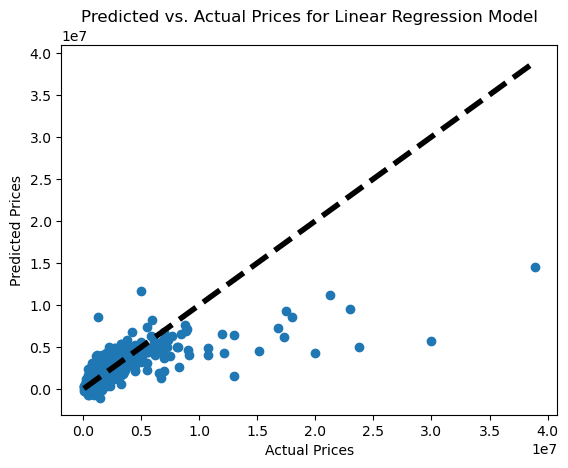

In [20]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_pred_lrm_1)
plt.title('Predicted vs. Actual Prices for Linear Regression Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()

#### 3.1.1.2. Cross-Validation Model

In [21]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_lrm_cv_1 = cross_val_score(model_lrm_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_1['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_lrm_cv_1 = cross_val_score(model_lrm_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_1['PRICE'], scoring='r2', cv=5)
mae_lrm_cv_1 = cross_val_score(model_lrm_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_1['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_lrm_cv_1 = np.sqrt(-mse_lrm_cv_1)

# Evaluate the Model
avg_rmse_lrm_cv_1 = rmse_lrm_cv_1.mean()
std_rmse_lrm_cv_1 = rmse_lrm_cv_1.std()
avg_r2_lrm_cv_1 = r2_lrm_cv_1.mean()
avg_mae_lrm_cv_1 = mae_lrm_cv_1.mean()


In [22]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_lrm_cv_1}")
print(f"MAE for Linear Regression Model (LRM) with Cross-Validation: {avg_mae_lrm_cv_1}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_lrm_cv_1}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_lrm_cv_1}")

RMSE for Linear Regression Model (LRM) with Cross-Validation: 946095.7390534166
MAE for Linear Regression Model (LRM) with Cross-Validation: -457339.4237212565
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.16177153597991084
Standard deviation for Linear Regression Model (LRM): 738127.9032356403


#### 3.1.1.3. Modification of Linear Regression into a Ridge Regression

In [23]:
scaler = StandardScaler()
x_train_scaled_1 = scaler.fit_transform(X_train_1)
x_test_scaled_1 = scaler.transform(X_test_1)

# Stating the model for Ridge Regression
ridge_model_1 = Ridge(alpha=1.0)

ridge_model_1.fit(x_train_scaled_1, y_train_1)
ridge_pred_1 = ridge_model_1.predict(x_test_scaled_1)

In [24]:
# Calculate metrics
test_mse_ridge_1 = mean_squared_error(y_test_1, ridge_pred_1)
test_rmse_ridge_1 = np.sqrt(test_mse_ridge_1)
test_mae_ridge_1 = mean_absolute_error(y_test_1, ridge_pred_1)
test_r2_ridge_1 = r2_score(y_test_1, ridge_pred_1)

print(f"Mean Squared Error: {test_mse_ridge_1}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_ridge_1}")
print(f"Mean Absolute Error (MAE): {test_rmse_ridge_1}")
print(f"R² Score: {test_r2_ridge_1}")

Mean Squared Error: 906557060159.6685
Root Mean Squared Error (RMSE): 952132.9004711834
Mean Absolute Error (MAE): 952132.9004711834
R² Score: 0.528281813281473


#### 3.1.1.4. Cross-Validation Model (Ridge Regression)

In [25]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_ridge_cv_1 = cross_val_score(ridge_model_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_1['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_ridge_cv_1 = cross_val_score(ridge_model_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_1['PRICE'], scoring='r2', cv=5)
mae_ridge_cv_1 = cross_val_score(ridge_model_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_1['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_ridge_cv_1 = np.sqrt(-mse_ridge_cv_1)


# Evaluate the Model
avg_rmse_ridge_cv_1 = rmse_ridge_cv_1.mean()
std_rmse_ridge_cv_1 = rmse_ridge_cv_1.std()
avg_r2_ridge_cv_1 = r2_ridge_cv_1.mean()
avg_mae_ridge_cv_1 = mae_ridge_cv_1.mean()


In [26]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_ridge_cv_1}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_ridge_cv_1}")
print(f"R2 Score for Mean Absolute Error (MAE) with Cross-Validation: {avg_mae_ridge_cv_1}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_ridge_cv_1}")

RMSE for Linear Regression Model (LRM) with Cross-Validation: 946238.6013664289
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.16178723335191147
R2 Score for Mean Absolute Error (MAE) with Cross-Validation: -457689.85884409596
Standard deviation for Linear Regression Model (LRM): 738444.4935153048


#### 3.1.1.5. Hyperparameter Tuning using GridSearch(Ridge Regression)

In [27]:
# Setup the hyperparameter grid
param_grid_1 = {'alpha': [0.1, 1, 10, 100, 1000]}  # alpha is the regularization strength

# Setup the GridSearchCV object
ridge_grid_search_1 = GridSearchCV(estimator=ridge_model_1, param_grid=param_grid_1, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Train the model with grid search
ridge_grid_search_1.fit(X_train_1, y_train_1)

# Best model after grid search
ridge_best_model_1 = ridge_grid_search_1.best_estimator_

# Predict on the testing set using the best model
y_pred_ridge_best_1 = ridge_best_model_1.predict(X_test_1)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [28]:
# Evaluating Model
train_r2_ridge_grid_1 = ridge_best_model_1.score(X_train_1, y_train_1)
test_r2_ridge_grid_1 = r2_score(y_test_1, y_pred_ridge_best_1)
test_mse_ridge_grid_1 = mean_squared_error(y_test_1, y_pred_ridge_best_1)
test_rmse_ridge_grid_1 = test_mse_ridge_grid_1 ** 0.5
test_mae_ridge_grid_1 = mean_absolute_error(y_test_1, y_pred_ridge_best_1)

In [29]:
print("Best Alpha:", ridge_grid_search_1.best_params_)
print("Best RMSE:", test_rmse_ridge_grid_1)
print("Train R^2:", train_r2_ridge_grid_1)
print("Test R^2:", test_r2_ridge_grid_1)
print("Test MAE:", test_mae_ridge_grid_1)

Best Alpha: {'alpha': 1000}
Best RMSE: 952948.7228637135
Train R^2: 0.4685873215861125
Test R^2: 0.5274730960713727
Test MAE: 422209.81348639476


#### 3.1.1.6. Linear Regression Model Comparison

In [30]:
# Displaying the comparison through a table

linear_comparison_1 = {
    'Model': ['Linear Regression', 'Linear Regression with CV', 'Ridge Regression', 'Ridge Regression with CV', 'Ridge Regression with GridSearch'],
    'Model Object': [model_lrm_1, model_lrm_1, ridge_model_1, ridge_model_1, ridge_best_model_1],
    'RMSE': [test_rmse_lrm_1, avg_rmse_lrm_cv_1, test_rmse_ridge_1, avg_rmse_ridge_cv_1, test_rmse_ridge_grid_1],
    'MAE': [test_mae_lrm_1, avg_mae_lrm_cv_1, test_mae_ridge_1, avg_mae_ridge_cv_1, test_mae_ridge_grid_1],
    'R-Squared Score': [test_r2_lrm_1, avg_r2_lrm_cv_1, test_r2_ridge_1, avg_r2_ridge_cv_1, test_r2_ridge_grid_1]
}

linreg_comparison_1 = pd.DataFrame(linear_comparison_1)

linreg_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,Ridge Regression,Ridge(),952132.900471,426634.536260,0.528282
0,Linear Regression,LinearRegression(),952138.271682,426703.997554,0.528276
4,Ridge Regression with GridSearch,Ridge(alpha=1000),952948.722864,422209.813486,0.527473
3,Ridge Regression with CV,Ridge(),946238.601366,-457689.858844,0.161787
1,Linear Regression with CV,LinearRegression(),946095.739053,-457339.423721,0.161772


In [31]:
# # Sort the DataFrame by 'R-Squared Score' in descending order
# linreg_comparison_1 = linreg_comparison_1.sort_values('R-Squared Score', ascending=False)

# # Define a list of colors, one for each model
# colors_linreg_1 = ['navy', 'lightgreen', 'salmon', 'purple', 'orange']

# # Create a figure and a set of subplots
# fig_linreg_1, ax_linreg_1 = plt.subplots(figsize=(10, 6))

# # Plot R-Squared Score as bar graph with different colors
# rmse_bars_linreg_1 = linreg_comparison_1.plot(
#     kind='bar',
#     x='Model',
#     y='R-Squared Score',
#     color=colors_linreg_1,  # Apply different colors
#     ax=ax_linreg_1,
#     label='R-Squared Score',
#     width=0.75
# )

# # Setting titles and labels
# ax_linreg_1.set_ylabel('R-Squared Score', color='black')  # Updated label
# ax_linreg_1.set_title('Linear Regression Model Performance Comparison')

# # Rotate x-axis labels
# ax_linreg_1.set_xticklabels(ax_linreg_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# # Legend configuration
# lines_linreg_1, labels_linreg_1 = ax_linreg_1.get_legend_handles_labels()
# ax_linreg_1.legend(lines_linreg_1, labels_linreg_1)

# # Show the plot
# plt.show()

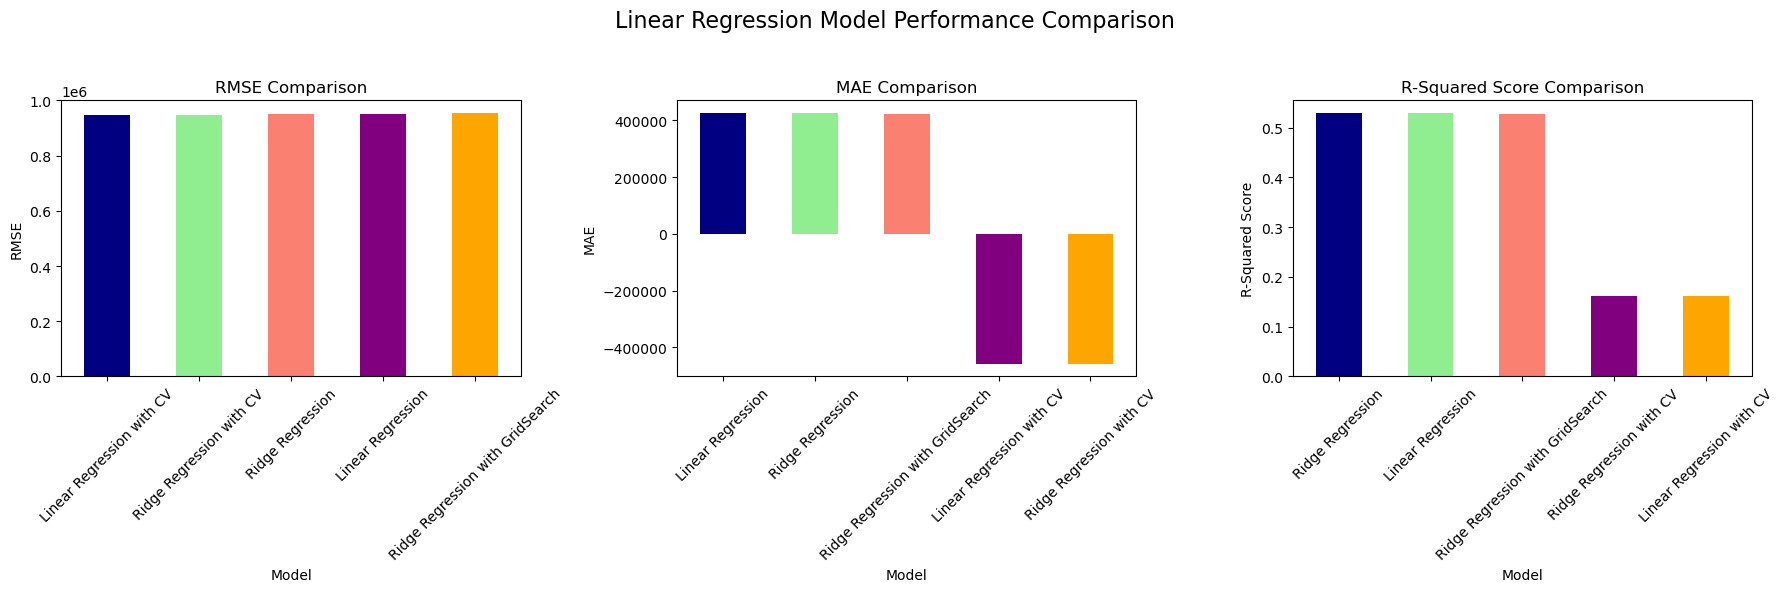

In [32]:
# Define a list of colors, one for each model
colors_linreg_1 = ['navy', 'lightgreen', 'salmon', 'purple', 'orange']

# Create a figure with 3 subplots, one for each score, laid out horizontally
fig_linreg_1, ax_linreg_1 = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figure size as needed

# Plot RMSE
linreg_comparison_1.sort_values('RMSE', ascending=True).plot(
    kind='bar',
    x='Model',
    y='RMSE',
    ax=ax_linreg_1[0],
    color=colors_linreg_1,
    legend=False,
    title='RMSE Comparison'
)
ax_linreg_1[0].set_ylabel('RMSE')
ax_linreg_1[0].set_xticklabels(ax_linreg_1[0].get_xticklabels(), rotation=45)

# Plot MAE
linreg_comparison_1.sort_values('MAE', ascending=False).plot(
    kind='bar',
    x='Model',
    y='MAE',
    ax=ax_linreg_1[1],
    color=colors_linreg_1,
    legend=False,
    title='MAE Comparison'
)
ax_linreg_1[1].set_ylabel('MAE')
ax_linreg_1[1].set_xticklabels(ax_linreg_1[1].get_xticklabels(), rotation=45)

# Plot R-Squared Score
linreg_comparison_1.sort_values('R-Squared Score', ascending=False).plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    ax=ax_linreg_1[2],
    color=colors_linreg_1,
    legend=False,
    title='R-Squared Score Comparison'
)
ax_linreg_1[2].set_ylabel('R-Squared Score')
ax_linreg_1[2].set_xticklabels(ax_linreg_1[2].get_xticklabels(), rotation=45)

# Set overall plot title
fig_linreg_1.suptitle('Linear Regression Model Performance Comparison', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameters as needed for the title to fit

# Show the plot
plt.show()

#### 3.1.1.7. Choosing Best Model

In [33]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
sorted_linreg_model_1 = linreg_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_linreg_model_name_1 = sorted_linreg_model_1.iloc[0]['Model']
best_linreg_model_1 = sorted_linreg_model_1.iloc[0]['Model Object']
best_linreg_r2_score_1 = sorted_linreg_model_1.iloc[0]['R-Squared Score']
best_linreg_rmse_1 = sorted_linreg_model_1.iloc[0]['RMSE']
best_linreg_mae_1 = sorted_linreg_model_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_linreg_1 = best_linreg_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_linreg_1)
print("R-Squared Score is:", best_linreg_r2_score_1)
print("RMSE Score is:", best_linreg_rmse_1)
print("MAE Score is:", best_linreg_mae_1)

The best model based on R-Squared Score is: Ridge Regression
R-Squared Score is: 0.528281813281473
RMSE Score is: 952132.9004711834
MAE Score is: 426634.536260336


### 3.1.2. XGBoost Model (XGB)

#### 3.1.2.1. Baseline Model

In [34]:
# Uploading XGBoost library
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
model_xgb_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Train the model on the training data
model_xgb_1.fit(X_train_1, y_train_1)

# Predict on the testing set
y_pred_xgb_1 = model_xgb_1.predict(X_test_1)

# Evaluate Model
train_r2_xgb_1 = model_xgb_1.score(X_train_1, y_train_1)
test_r2_xgb1_1 = r2_score(y_test_1,y_pred_xgb_1)
test_rmse_xgb_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_xgb_1))
test_mae_xgb_1 = mean_absolute_error(y_test_1, y_pred_xgb_1)  # Calculate MAE


In [35]:
# Printing the results of the XGBoost Model
print(f"R2 Score on Training set for XGBoost Model (LRM): {train_r2_xgb_1}")
print(f"R2 Score on Test set for XGBoost Model (LRM): {test_r2_xgb1_1}")
print(f"RMSE on Test set for XGBoost Model (LRM): {test_rmse_xgb_1}")
print(f"MAE on Test set for XGBoost Model (LRM): {test_mae_xgb_1}")


R2 Score on Training set for XGBoost Model (LRM): 0.9986664593352045
R2 Score on Test set for XGBoost Model (LRM): 0.6392447305635774
RMSE on Test set for XGBoost Model (LRM): 832650.224966097
MAE on Test set for XGBoost Model (LRM): 187907.8657734375


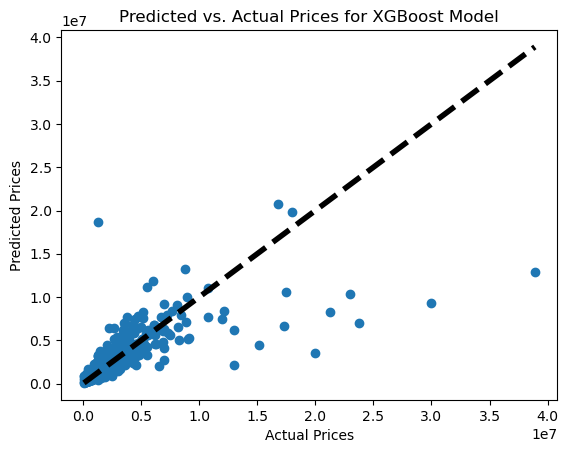

In [36]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_pred_xgb_1)
plt.title('Predicted vs. Actual Prices for XGBoost Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()


##### Cross-Validation

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np
import xgboost as xgb

# Define the model
model_xgb_cv_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Define a custom RMSE scorer
rmse_scorer_xgb_cv_1 = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation using RMSE
train_rmse_xgb_cv_1 = cross_val_score(model_xgb_cv_1, X_train_1, y_train_1, cv=5, scoring=rmse_scorer_xgb_cv_1)

# Perform cross-validation using R^2
train_r2_xgb_cv_1 = cross_val_score(model_xgb_cv_1, X_train_1, y_train_1, cv=5, scoring='r2')


In [38]:
# Print cross-validation results
print("Training Cross-Validated RMSE scores:", -train_rmse_xgb_cv_1.mean())
print("Training Cross-Validated R^2 scores:", train_r2_xgb_cv_1.mean())


Training Cross-Validated RMSE scores: 869712.9585612789
Training Cross-Validated R^2 scores: 0.5124137059161205


In [39]:
# Train the model on the entire training dataset for final evaluation
model_xgb_cv_1.fit(X_train_1, y_train_1)

# Predict on the testing set
y_pred_xgb_cv_1 = model_xgb_cv_1.predict(X_test_1)

# Evaluate the model on the testing set
test_mse_xgb_cv_1 = mean_squared_error(y_test_1, y_pred_xgb_cv_1)
test_rmse_xgb_cv_1 = np.sqrt(test_mse_xgb_cv_1)
test_r2_xgb_cv_1 = r2_score(y_test_1, y_pred_xgb_cv_1)


In [40]:
# Print the test evaluation results
print(f"Test MSE: {test_mse_xgb_cv_1}")
print(f"Test RMSE: {test_rmse_xgb_cv_1}")
print(f"Test R² Score: {test_r2_xgb_cv_1}")

Test MSE: 693306397136.092
Test RMSE: 832650.224966097
Test R² Score: 0.6392447305635774


#### 3.1.2.2. GridSearch

In [41]:
# Variety of the XGBoost model

# Uploading library
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define the parameter grid for the XGBoost Model with GridSearch
param_grid_xgbgs_1 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Setup GridSearchCV
xgbgs_reg_1 = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgbgs_1 = GridSearchCV(estimator=xgbgs_reg_1, param_grid=param_grid_xgbgs_1, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search_xgbgs_1.fit(X_train_1, y_train_1)

# Best hyperparameters and model
print("Best parameters:", grid_search_xgbgs_1.best_params_)
xgbgs_best_model_1 = grid_search_xgbgs_1.best_estimator_

# Predictions and evaluation on the training set
y_train_pred_xgbgs_1 = xgbgs_best_model_1.predict(X_train_1)
train_rmse_xgbgs_1 = np.sqrt(mean_squared_error(y_train_1, y_train_pred_xgbgs_1))
train_r2_xgbgs_1 = r2_score(y_train_1, y_train_pred_xgbgs_1)

# Predictions and evaluation on the test set
y_test_pred_xgbgs_1 = xgbgs_best_model_1.predict(X_test_1)
test_rmse_xgbgs_1 = np.sqrt(mean_squared_error(y_test_1, y_test_pred_xgbgs_1))
test_r2_xgbgs_1 = r2_score(y_test_1, y_test_pred_xgbgs_1)
test_mae_xgbgs_1 = mean_absolute_error(y_test_1, y_test_pred_xgbgs_1)  # Calculate MAE



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END 

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=10

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100,

In [42]:
# Prediction Results for XGBoost Model with GridSearch
print(f"RMSE on Training set for XGBoost GridSearch Model: {train_rmse_xgbgs_1}")
print(f"R2 Score on Training set for XGBoost GridSearch Model: {train_r2_xgbgs_1}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_rmse_xgbgs_1}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_mae_xgbgs_1}")
print(f"R2 Score on Test set for XGBoost GridSearch Model: {test_r2_xgbgs_1}")

RMSE on Training set for XGBoost GridSearch Model: 298472.15924130037
R2 Score on Training set for XGBoost GridSearch Model: 0.9601506007363957
RMSE on Test set for XGBoost GridSearch Model: 825176.2333787958
RMSE on Test set for XGBoost GridSearch Model: 252846.3792796875
R2 Score on Test set for XGBoost GridSearch Model: 0.6456920493920645


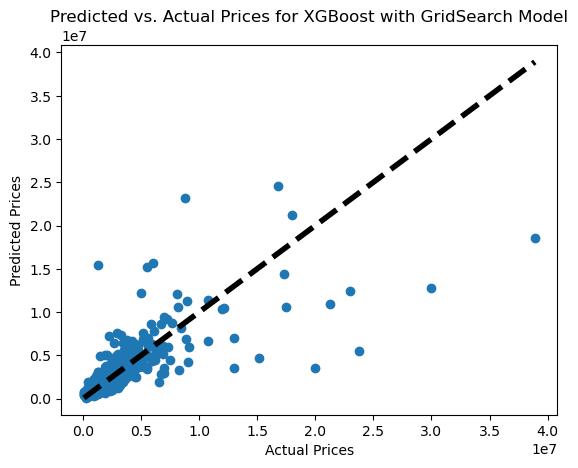

In [43]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_test_pred_xgbgs_1)
plt.title('Predicted vs. Actual Prices for XGBoost with GridSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()


#### 3.1.2.3. RandomizedSearch

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid
param_grid_xgbrs_1 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]
}

# Initialize the XGBRegressor
xgbrs_reg_1 = XGBRegressor(objective='reg:squarederror')

# Setup RandomizedSearchCV
random_search_xgbrs_1 = RandomizedSearchCV(xgbrs_reg_1, param_distributions=param_grid_xgbrs_1, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)

random_search_xgbrs_1.fit(X_train_1, y_train_1)

# Best parameters and model
xgbrs_best_params_1 = random_search_xgbrs_1.best_params_
xgbrs_best_model_1 = random_search_xgbrs_1.best_estimator_

print(f"Best Parameters: {xgbrs_best_params_1}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END co

In [45]:
# Predictions on training set
y_train_pred_xgbrs_1 = xgbrs_best_model_1.predict(X_train_1)

# Predictions on test set
y_test_pred_xgbrs_1 = xgbrs_best_model_1.predict(X_test_1)

# Calculate MAE for training and test sets
train_mae_xgbrs_1 = mean_absolute_error(y_train_1, y_train_pred_xgbrs_1)
test_mae_xgbrs_1 = mean_absolute_error(y_test_1, y_test_pred_xgbrs_1)

# Calculate RMSE for training and test sets
train_rmse_xgbrs_1 = np.sqrt(mean_squared_error(y_train_1, y_train_pred_xgbrs_1))
test_rmse_xgbrs_1 = np.sqrt(mean_squared_error(y_test_1, y_test_pred_xgbrs_1))

# Calculate R-squared for training and test sets
train_r2_xgbrs_1 = r2_score(y_train_1, y_train_pred_xgbrs_1)
test_r2_xgbrs_1 = r2_score(y_test_1, y_test_pred_xgbrs_1)

print(f"Training RMSE: {train_rmse_xgbrs_1}, Test RMSE: {test_rmse_xgbrs_1}")
print(f"Training MAE: {train_mae_xgbrs_1}, Test MAE: {test_mae_xgbrs_1}")
print(f"Training R^2: {train_r2_xgbrs_1}, Test R^2: {test_r2_xgbrs_1}")

Training RMSE: 245508.53677453502, Test RMSE: 825962.4428111279
Training MAE: 152652.71616324803, Test MAE: 241427.438871875
Training R^2: 0.9730382970392951, Test R^2: 0.6450165743979248


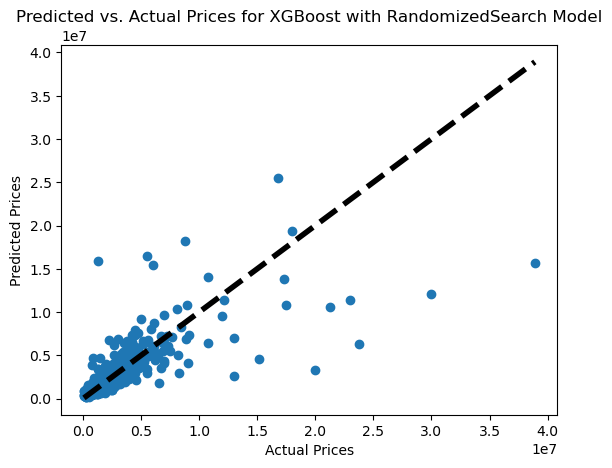

In [46]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_test_pred_xgbrs_1)
plt.title('Predicted vs. Actual Prices for XGBoost with RandomizedSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()


#### 3.1.2.4. XGBoost Model Comparison

In [47]:
# Displaying the comparison through a table

xgb_comparison_1 = {
    'Model': ['XGBoost Baseline Model', 'XGBoost with GridSearch', 'XGBoost with RandomizedSearch'],
    'Model Object': [model_xgb_1, xgbgs_best_model_1, xgbrs_best_model_1],
    'RMSE': [test_rmse_xgb_cv_1, test_rmse_xgbgs_1, test_rmse_xgbrs_1],
    'MAE': [test_mae_xgb_1, test_mae_xgbgs_1, test_mae_xgbrs_1],
    'R-Squared Score': [test_r2_xgb_cv_1, test_r2_xgbgs_1, test_r2_xgbrs_1]
}

xgb_comparison_1 = pd.DataFrame(xgb_comparison_1)

xgb_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",825176.233379,252846.379280,0.645692
2,XGBoost with RandomizedSearch,"XGBRegressor(base_score=None, booster=None, ca...",825962.442811,241427.438872,0.645017
0,XGBoost Baseline Model,"XGBRegressor(base_score=None, booster=None, ca...",832650.224966,187907.865773,0.639245


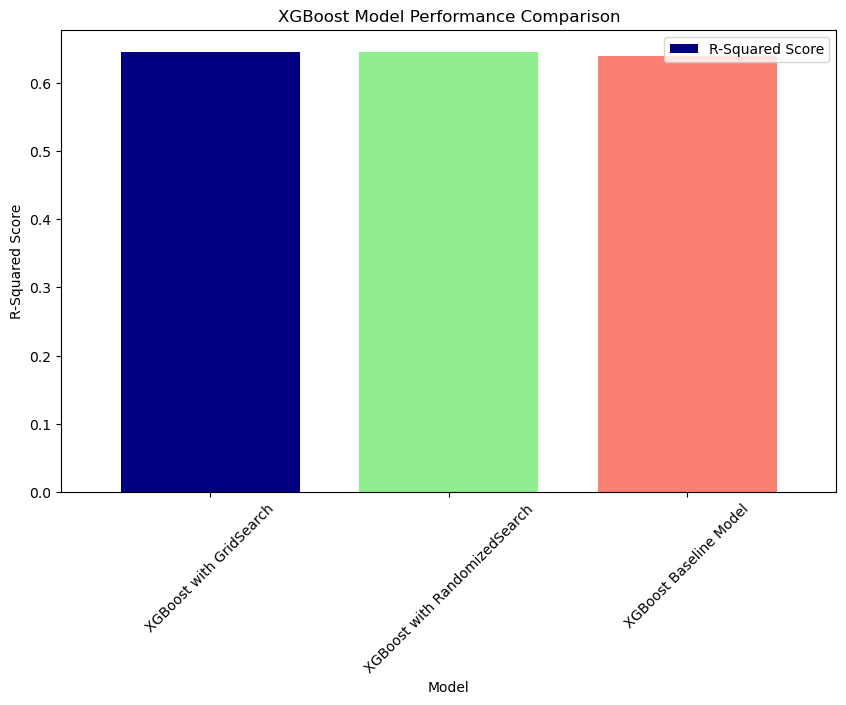

In [48]:
# Sort the DataFrame by 'R-Squared Score' in descending order
xgb_comparison_1 = xgb_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_xgb_1 = ['navy', 'lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_xgb_1, ax_xgb_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
rmse_bars_xgb_1 = xgb_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_xgb_1,  # Apply different colors
    ax=ax_xgb_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_xgb_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_xgb_1.set_title('XGBoost Model Performance Comparison')

# Rotate x-axis labels
ax_xgb_1.set_xticklabels(ax_xgb_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_xgb_1, labels_xgb_1 = ax_xgb_1.get_legend_handles_labels()
ax_xgb_1.legend(lines_xgb_1, labels_xgb_1)

# Show the plot
plt.show()

#### 3.1.2.5. Choosing the Best XGBoost Model

In [49]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
xgb_comparison_1 = xgb_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_xgb_model_name_1 = xgb_comparison_1.iloc[0]['Model']
best_xgb_model_1 = xgb_comparison_1.iloc[0]['Model Object']
best_xgb_r2_score_1 = xgb_comparison_1.iloc[0]['R-Squared Score']
best_xgb_mae_1 = xgb_comparison_1.iloc[0]['MAE']
best_xgb_rmse_1 = xgb_comparison_1.iloc[0]['RMSE']

# Extract the model name with the highest R-Squared Score
best_xgb_1 = best_xgb_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_xgb_1)
print("R-Squared Score:", best_xgb_r2_score_1)
print("RMSE:", best_xgb_rmse_1)
print("MAE:", best_xgb_mae_1)

The best model based on R-Squared Score is: XGBoost with GridSearch
R-Squared Score: 0.6456920493920645
RMSE: 825176.2333787958
MAE: 252846.3792796875


### 3.1.3. RandomForest Model (RF)

#### 3.1.3.1. Baseline Model

In [50]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_1 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_1 = rf_model_1.fit(X_train_1, y_train_1)

# Predict on the test set
test_rf_pred_1 = rf_model_1.predict(X_test_1)


In [51]:
# Calculate evaluation metrics
test_mse_rf_1 = mean_squared_error(y_test_1, test_rf_pred_1)
test_rmse_rf_1 = np.sqrt(test_mse_rf_1)
test_mae_rf_1 = mean_absolute_error(y_test_1, test_rf_pred_1)
test_r2_rf_1 = r2_score(y_test_1, test_rf_pred_1)

print(f"Mean Squared Error: {test_mse_rf_1}")
print(f"Root Mean Squared Error: {test_rmse_rf_1}")
print(f"Root Mean Squared Error: {test_mae_rf_1}")
print(f"R² Score: {test_r2_rf_1}")

Mean Squared Error: 558418653519.185
Root Mean Squared Error: 747274.1488364127
Root Mean Squared Error: 194532.2377225225
R² Score: 0.7094322616367061


#### 3.1.3.2. Cross-Validation Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score_rfcv_1(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer_rfcv_1 = make_scorer(rmse_score_rfcv_1, greater_is_better=False)

# Cross-validate the model using RMSE
train_rmse_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring=rmse_scorer_rfcv_1)

# Cross-validate the model using Mean Absolute Error
train_mae_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='neg_mean_absolute_error')

# Cross-validate the model using R^2
train_r2_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='r2')


In [53]:
# Print cross-validation results
print("CV RMSE scores:", -train_rmse_rf_cv_1)  # Negate RMSE scores because make_scorer(mse, greater_is_better=False) makes them negative
print("CV RMSE average score:", -np.mean(train_rmse_rf_cv_1))

print("CV R^2 scores:", -train_mae_rf_cv_1)
print("CV R^2 average score:", np.mean(train_mae_rf_cv_1))

print("CV R^2 scores:", train_r2_rf_cv_1)
print("CV R^2 average score:", np.mean(train_r2_rf_cv_1))

CV RMSE scores: [ 628601.13579572  830055.4748877   521063.83853062 1071275.7837918
  709127.07398755]
CV RMSE average score: 752024.6613986775
CV R^2 scores: [206000.14370243 206908.88162313 181543.26650081 215602.54439574
 196001.0128321 ]
CV R^2 average score: -201211.1698108432
CV R^2 scores: [0.74523086 0.80835234 0.8182906  0.68312797 0.44813671]
CV R^2 average score: 0.7006276978783412


#### 3.1.3.3. Hyperparameter Tuning

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_1 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_1 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_1 = GridSearchCV(estimator=rfgs_model_1, param_grid=param_grid_rfgs_1, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_1.fit(X_train_1, y_train_1)

# Get the best estimator
best_rfgs_model_1 = grid_search_rf_1.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_1 = best_rfgs_model_1.predict(X_test_1)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
584 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [55]:
# Calculate evaluation metrics
test_mse_rfgs_1 = mean_squared_error(y_test_1, test_rfgs_pred_1)
test_rmse_rfgs_1 = np.sqrt(test_mse_rfgs_1)
test_mae_rfgs_1 = mean_absolute_error(y_test_1, test_rfgs_pred_1)
test_r2_rfgs_1 = r2_score(y_test_1, test_rfgs_pred_1)

# Print the results
print("Best model parameters:", grid_search_rf_1.best_params_)
print(f"Test MSE: {test_mse_rfgs_1}")
print(f"Test RMSE: {test_rmse_rfgs_1}")
print(f"Test MAE: {test_mae_rfgs_1}")
print(f"Test R² Score: {test_r2_rfgs_1}")

Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 531254359293.0176
Test RMSE: 728871.9772998668
Test MAE: 162993.03230100474
Test R² Score: 0.7235669390651731


#### 3.1.3.4. RandomForest Model Comparison

In [56]:
# Displaying the comparison through a table

rf_comparison_1 = {
    'Model': ['Random Forest Baseline Model', 'Random Forest with GridSearch'],
    'Model Object': [rf_model_1, best_rfgs_model_1],
    'RMSE': [test_rmse_rf_1, test_rmse_rfgs_1],
    'MAE': [test_mae_rf_1, test_mae_rfgs_1],
    'R-Squared Score': [test_r2_rf_1, test_r2_rfgs_1]
}

rf_comparison_1 = pd.DataFrame(rf_comparison_1)

rf_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",728871.977300,162993.032301,0.723567
0,Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",747274.148836,194532.237723,0.709432


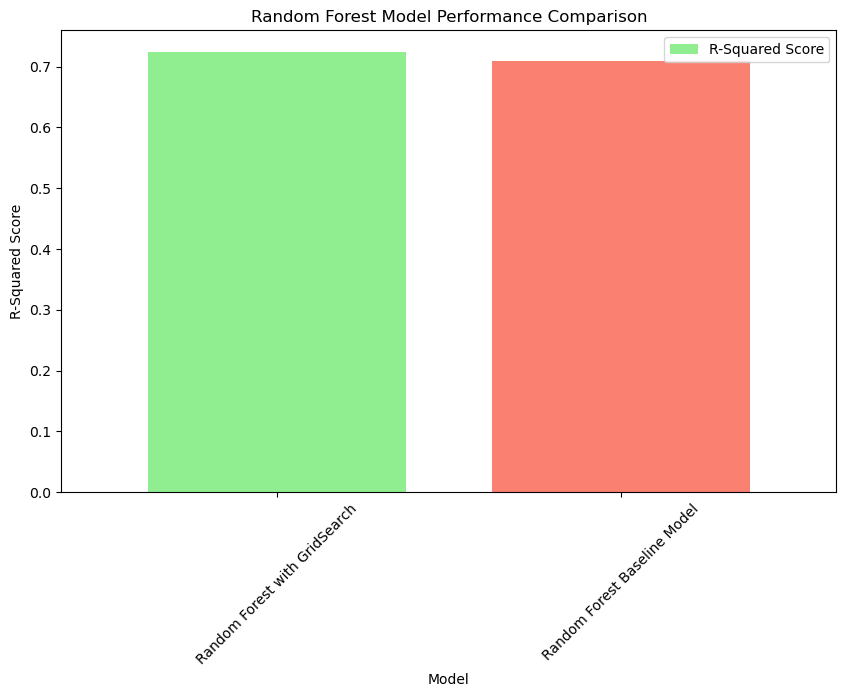

In [57]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_1 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_1, ax_rf_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_1 = rf_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_1,  # Apply different colors
    ax=ax_rf_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_1.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_1.set_xticklabels(ax_rf_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_1, labels_rf_1 = ax_rf_1.get_legend_handles_labels()
ax_rf_1.legend(lines_rf_1, labels_rf_1)

# Show the plot
plt.show()

#### 3.1.3.5. Choosing the Best Model

In [58]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_1 = rf_comparison_1.iloc[0]['Model']
best_rf_model_1 = rf_comparison_1.iloc[0]['Model Object']
best_rf_r2_score_1 = rf_comparison_1.iloc[0]['R-Squared Score']
best_rf_rmse_1 = rf_comparison_1.iloc[0]['RMSE']
best_rf_mae_1 = rf_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_1 = best_rf_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_1)
print("The highest R-Squared Score is:", best_rf_r2_score_1)
print("The best RMSE is:", best_rf_rmse_1)
print("The best MAE is:", best_rf_mae_1)

The best model based on R-Squared Score is: Random Forest with GridSearch
The highest R-Squared Score is: 0.7235669390651731
The best RMSE is: 728871.9772998668
The best MAE is: 162993.03230100474


### 3.1.4. Regression Model Comparison

In [59]:
# Displaying the comparison through a table

reg_comparison_1 = {
    'Model': [best_linreg_model_name_1, best_xgb_model_name_1, best_rf_model_name_1],
    'Model Object': [best_linreg_model_1, best_xgb_model_1, best_rf_model_1],
    'RMSE': [best_linreg_rmse_1, best_xgb_rmse_1, best_rf_rmse_1],
    'MAE': [best_linreg_mae_1, best_xgb_mae_1, best_rf_mae_1],
    'R-Squared Score': [best_linreg_r2_score_1, best_xgb_r2_score_1, best_rf_r2_score_1]
}

reg_comparison_1 = pd.DataFrame(reg_comparison_1)

reg_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",728871.977300,162993.032301,0.723567
1,XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",825176.233379,252846.379280,0.645692
0,Ridge Regression,Ridge(),952132.900471,426634.536260,0.528282


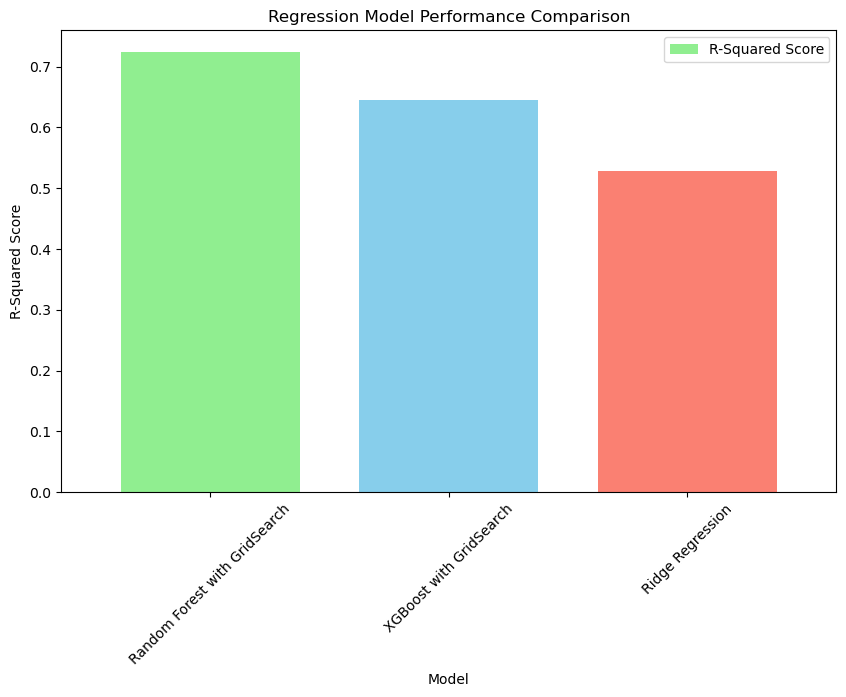

In [60]:
# Sort the DataFrame by 'R-Squared Score' in descending order
reg_comparison_1 = reg_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_reg_1 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_reg_1, ax_reg_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_reg_1 = reg_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_reg_1,  # Apply different colors
    ax=ax_reg_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_reg_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_reg_1.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_reg_1.set_xticklabels(ax_reg_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_reg_1, labels_reg_1 = ax_reg_1.get_legend_handles_labels()
ax_reg_1.legend(lines_reg_1, labels_reg_1)

# Show the plot
plt.show()

### 3.1.5. Feature Importance from Best Regression Models

In [61]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
reg_comparison_1 = reg_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_reg_model_name_1 = reg_comparison_1.iloc[0]['Model']
best_reg_model_1 = reg_comparison_1.iloc[0]['Model Object']
best_reg_r2_score_1 = reg_comparison_1.iloc[0]['R-Squared Score']
best_reg_rmse_1 = reg_comparison_1.iloc[0]['RMSE']
best_reg_mae_1 = reg_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_reg_1 = best_reg_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_reg_1)
print("The highest R-Squared Score is:", best_reg_r2_score_1)
print("The best RMSE is:", best_reg_rmse_1)
print("The best MAE is:", best_reg_mae_1)

The best model based on R-Squared Score is: Random Forest with GridSearch
The highest R-Squared Score is: 0.7235669390651731
The best RMSE is: 728871.9772998668
The best MAE is: 162993.03230100474


In [62]:
# We choose the model with the highest R-Squared

# Feature importance
best_reg_feature_importances_1 = best_reg_model_1.feature_importances_
best_reg_features_1 = pd.DataFrame({'Feature': X_train_1.columns, 'Importance': best_reg_feature_importances_1})
best_reg_features_1.sort_values(by='Importance', ascending=False, inplace=True)
print(best_reg_features_1)

                             Feature  Importance
2                        SQUARE FEET    0.368884
5          bus_station_accessibility    0.112005
1                              BATHS    0.109594
11              school_accessibility    0.082221
9      transit_station_accessibility    0.072964
10           preschool_accessibility    0.061622
12                park_accessibility    0.060269
0                               BEDS    0.055227
3                                AGE    0.046781
13            hospital_accessibility    0.019810
4              airport_accessibility    0.005311
7   light_rail_station_accessibility    0.004544
8        train_station_accessibility    0.000460
6       ferry_terminal_accessibility    0.000308


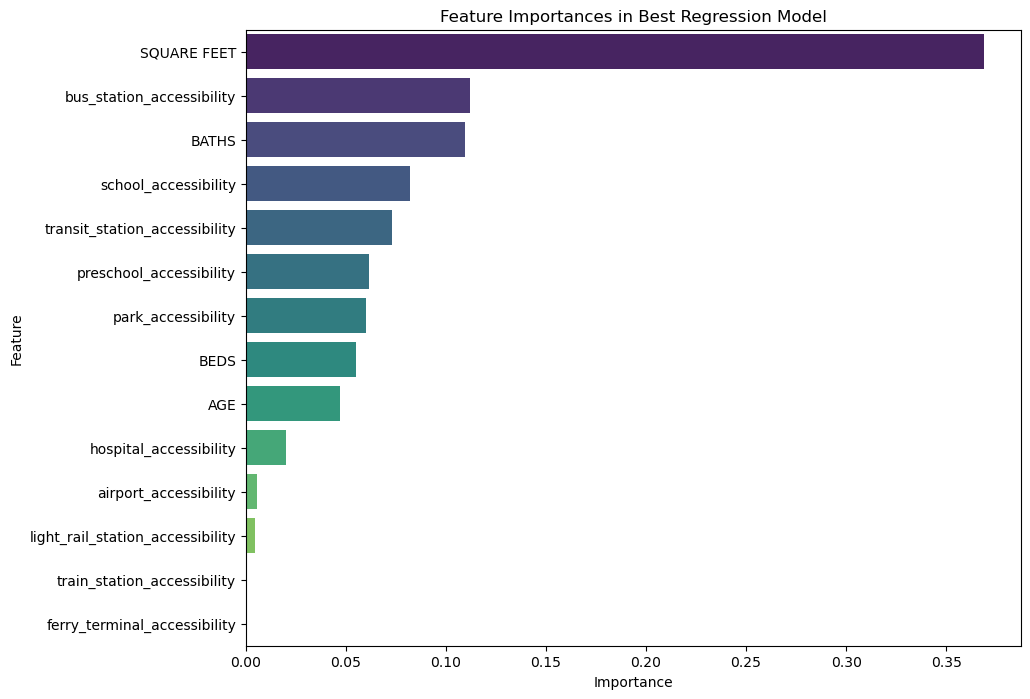

In [63]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=best_reg_features_1, palette='viridis')
plt.title('Feature Importances in Best Regression Model')
plt.show()

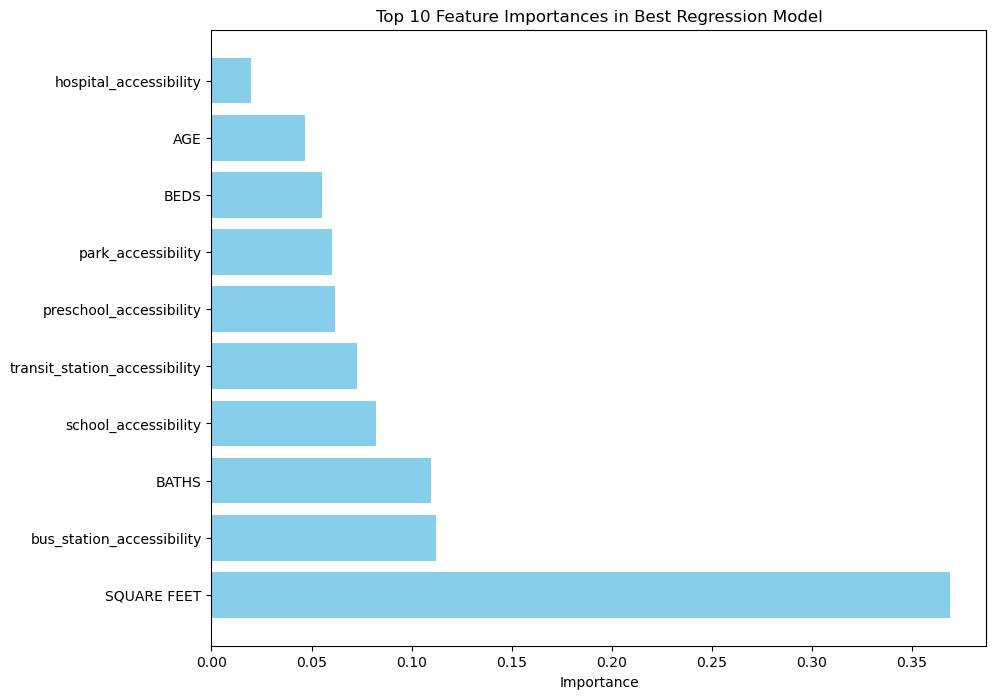

In [64]:
# Display only the top N features for clarity
top_n = 10
plt.figure(figsize=(10, 8))
plt.barh(best_reg_features_1['Feature'][:top_n], best_reg_features_1['Importance'][:top_n], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances in Best Regression Model')
plt.show()


### 3.1.6. Neural Network Model

#### 3.1.6.1. All Features

In [65]:
# Library needed for Neural Network
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import random as python_random
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [66]:
np.random.seed(99)
python_random.seed(99)
tf.random.set_seed(99)

##### Baseline Model

In [67]:
# Initialize the neural network model
nn_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_1.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])


# Compile the model
nn_model_1.compile(optimizer=Adam(learning_rate=0.005), loss='mse')  # Using Mean Squared Error for regression

In [68]:
# Train the model
nn_history_1 = nn_model_1.fit(X_train_1, y_train_1, epochs=150, validation_split=0.1, batch_size=32)

Epoch 1/150

329/329 [==============================] - 4s 5ms/step - loss: 1888535838720.0000 - val_loss: 866691514368.0000
Epoch 2/150
329/329 [==============================] - 2s 7ms/step - loss: 1487925542912.0000 - val_loss: 470860169216.0000
Epoch 3/150
329/329 [==============================] - 1s 4ms/step - loss: 1426537709568.0000 - val_loss: 465815339008.0000
Epoch 4/150
329/329 [==============================] - 1s 4ms/step - loss: 1390026555392.0000 - val_loss: 417714601984.0000
Epoch 5/150
329/329 [==============================] - 1s 4ms/step - loss: 1345615429632.0000 - val_loss: 502815424512.0000
Epoch 6/150
329/329 [==============================] - 2s 5ms/step - loss: 1307441364992.0000 - val_loss: 433239162880.0000
Epoch 7/150
329/329 [==============================] - 1s 4ms/step - loss: 1305350373376.0000 - val_loss: 480940883968.0000
Epoch 8/150
329/329 [==============================] - 1s 4ms/step - loss: 1234568216576.0000 - val_loss: 499168444416.0000
Epoch 9

Epoch 65/150
329/329 [==============================] - 1s 4ms/step - loss: 1028718592000.0000 - val_loss: 319121260544.0000
Epoch 66/150
329/329 [==============================] - 1s 5ms/step - loss: 962483585024.0000 - val_loss: 317146038272.0000
Epoch 67/150
329/329 [==============================] - 1s 4ms/step - loss: 1018330021888.0000 - val_loss: 333340966912.0000
Epoch 68/150
329/329 [==============================] - 1s 4ms/step - loss: 953363660800.0000 - val_loss: 344321622016.0000
Epoch 69/150
329/329 [==============================] - 1s 4ms/step - loss: 976523100160.0000 - val_loss: 586591764480.0000
Epoch 70/150
329/329 [==============================] - 1s 4ms/step - loss: 1028385079296.0000 - val_loss: 319234768896.0000
Epoch 71/150
329/329 [==============================] - 1s 4ms/step - loss: 1020879831040.0000 - val_loss: 357303255040.0000
Epoch 72/150
329/329 [==============================] - 1s 4ms/step - loss: 955860975616.0000 - val_loss: 312255774720.0000
Epoc

329/329 [==============================] - 1s 4ms/step - loss: 946688950272.0000 - val_loss: 305143513088.0000
Epoch 131/150
329/329 [==============================] - 1s 3ms/step - loss: 884384661504.0000 - val_loss: 464697163776.0000
Epoch 132/150
329/329 [==============================] - 1s 4ms/step - loss: 894889361408.0000 - val_loss: 309891858432.0000
Epoch 133/150
329/329 [==============================] - 1s 3ms/step - loss: 924175302656.0000 - val_loss: 315075526656.0000
Epoch 134/150
329/329 [==============================] - 1s 3ms/step - loss: 929410318336.0000 - val_loss: 315965538304.0000
Epoch 135/150
329/329 [==============================] - 2s 6ms/step - loss: 914876203008.0000 - val_loss: 313456918528.0000
Epoch 136/150
329/329 [==============================] - 1s 3ms/step - loss: 982595469312.0000 - val_loss: 393898393600.0000
Epoch 137/150
329/329 [==============================] - 1s 4ms/step - loss: 929745534976.0000 - val_loss: 326774521856.0000
Epoch 138/150


In [69]:
# Evaluate the model on the test set
test_loss_nn_1 = nn_model_1.evaluate(X_test_1, y_test_1)
print(f'Baseline Neural Network Test Loss: {test_loss_nn_1}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_1 = nn_model_1.predict(X_test_1)
test_mse_nn_1 = mean_squared_error(y_test_1, test_pred_nn_1)
test_rmse_nn_1 = np.sqrt(test_mse_nn_1)
print(f'RMSE Score: {test_rmse_nn_1}')
test_mae_nn_1 = mean_absolute_error(y_test_1, test_pred_nn_1)
print(f'MAE Score: {test_mae_nn_1}')
test_r2_nn_1 = r2_score(y_test_1, test_pred_nn_1.flatten())
print(f'R2 Score: {test_r2_nn_1}')

157/157 [==============================] - 1s 2ms/step - loss: 575072960512.0000
Baseline Neural Network Test Loss: 575072960512.0
157/157 [==============================] - 1s 1ms/step
RMSE Score: 758335.5955640574
MAE Score: 285198.86416875
R2 Score: 0.700766398516766


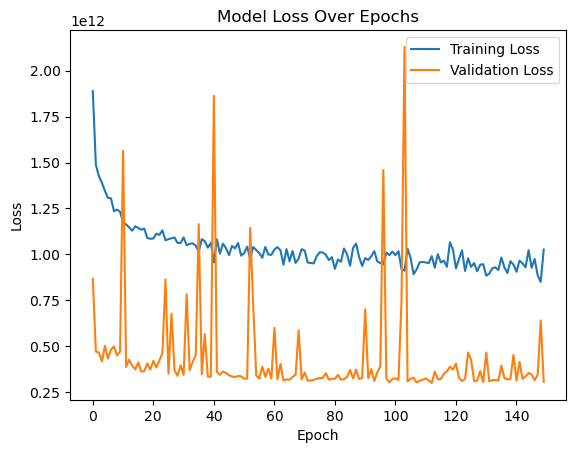

In [70]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_1 = nn_history_1.history['loss']
val_loss_nn_1 = nn_history_1.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_1, label='Training Loss')
plt.plot(val_loss_nn_1, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Baseline Neural Network with Early Stopping

In [71]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Adjusted model architecture
nn_early_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_1.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_early_model_1.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
nn_early_stopping_1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_early_history_1 = nn_early_model_1.fit(X_train_1, y_train_1, validation_split=0.1, epochs=150, batch_size=32, callbacks=[nn_early_stopping_1], verbose=1)

# Evaluate the model
test_loss_nn_early_1 = nn_early_model_1.evaluate(X_test_1, y_test_1, verbose=0)



Epoch 1/150
329/329 [==============================] - 10s 6ms/step - loss: 3170237415424.0000 - val_loss: 520188624896.0000
Epoch 2/150
329/329 [==============================] - 1s 4ms/step - loss: 1624355897344.0000 - val_loss: 441391677440.0000
Epoch 3/150
329/329 [==============================] - 1s 4ms/step - loss: 1532482813952.0000 - val_loss: 454962544640.0000
Epoch 4/150
329/329 [==============================] - 1s 3ms/step - loss: 1556775305216.0000 - val_loss: 435804962816.0000
Epoch 5/150
329/329 [==============================] - 1s 5ms/step - loss: 1507893051392.0000 - val_loss: 450342682624.0000
Epoch 6/150
329/329 [==============================] - 1s 3ms/step - loss: 1508199890944.0000 - val_loss: 476768043008.0000
Epoch 7/150
329/329 [==============================] - 1s 4ms/step - loss: 1468152283136.0000 - val_loss: 449425014784.0000
Epoch 8/150
329/329 [==============================] - 1s 4ms/step - loss: 1501905289216.0000 - val_loss: 454315933696.0000
Epoch 

In [72]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_early_1 = nn_early_model_1.predict(X_test_1)

test_mse_nn_early_1 = mean_squared_error(y_test_1, test_pred_nn_early_1)
test_rmse_nn_early_1 = np.sqrt(test_mse_nn_early_1)
print(f'RMSE Score: {test_rmse_nn_early_1}')
test_mae_nn_early_1 = mean_absolute_error(y_test_1, test_pred_nn_early_1)
print(f'RMSE Score: {test_mae_nn_early_1}')
test_r2_nn_early_1 = r2_score(y_test_1, test_pred_nn_early_1.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_early_1)

157/157 [==============================] - 1s 1ms/step
RMSE Score: 1051188.9438437417
RMSE Score: 381730.7946796875
Early Stopping Neural Network Model R2 Score: 0.4250248902238388


##### Hyperparameter Tuning

In [73]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class NeuralNetworkHyperModel_1(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_model_1 = Sequential()
        nnht_model_1.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_model_1.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_model_1.add(Dense(1))  # Output layer for regression
        
        nnht_model_1.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_model_1


C:\Users\ahska\AppData\Local\Temp\ipykernel_37632\1221919809.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [74]:
from kerastuner.tuners import RandomSearch

nnht_input_shape_1 = (X_train_1.shape[1],)
nnht_hypermodel_1 = NeuralNetworkHyperModel_1(input_shape=nnht_input_shape_1)

nnht_tuner_1 = RandomSearch(
    nnht_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_1g',
    project_name='nn_hypertuning_keras_1g'
)

nnht_tuner_1.search(X_train_1, y_train_1, epochs=50, validation_split=0.1)


Trial 20 Complete [00h 01m 02s]
val_loss: 416683835392.0

Best val_loss So Far: 333495664640.0
Total elapsed time: 00h 42m 25s


In [75]:
nnht_best_model_1 = nnht_tuner_1.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_1 = nnht_best_model_1.evaluate(X_test_1, y_test_1)
print(f'Best Neural Network Test Loss: {test_loss_nnht_1}')

# Predict and calculate R² Score
test_pred_nnht_1 = nnht_best_model_1.predict(X_test_1)
test_rmse_nnht_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_1))
test_mae_nnht_1 = mean_absolute_error(y_test_1, test_pred_nnht_1)
test_r2_nnht_1 = r2_score(y_test_1, test_pred_nnht_1.flatten())

print(f'RMSE: {test_rmse_nnht_1}')
print(f'MAE: {test_mae_nnht_1}')
print(f'R2 Score: {test_r2_nnht_1}')


157/157 [==============================] - 0s 1ms/step - loss: 637650796544.0000
Best Neural Network Test Loss: 637650796544.0
157/157 [==============================] - 0s 1ms/step
RMSE: 798530.4889264074
MAE: 291829.4745375
R2 Score: 0.6682045077820501


##### Hyper Model Neural Network with Early Stopping

In [76]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_early_stopping_1 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [77]:
# Setup your tuner
nnht_early_tuner_1 = RandomSearch(
    nnht_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_early_1g',
    project_name='nn_hypertuning_earlystopping_keras_1g'
)

Reloading Tuner from nnht_early_1g\nn_hypertuning_earlystopping_keras_1g\tuner0.json


In [78]:
# Start the search and include early stopping
nnht_early_tuner_1.search(
    X_train_1, 
    y_train_1, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_early_stopping_1]
)

Trial 20 Complete [00h 00m 19s]
val_loss: 416307838976.0

Best val_loss So Far: 320720666624.0
Total elapsed time: 00h 08m 00s


In [79]:
# Retrieve and evaluate the best model
nnht_early_best_model_1 = nnht_early_tuner_1.get_best_models(num_models=1)[0]
test_loss_nnht_early_1 = nnht_early_best_model_1.evaluate(X_test_1, y_test_1)
test_pred_nnht_early_1 = nnht_early_best_model_1.predict(X_test_1)
test_rmse_nnht_early_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_early_1))
test_mae_nnht_early_1 = mean_absolute_error(y_test_1, test_pred_nnht_early_1)
test_r2_nnht_early_1 = r2_score(y_test_1, test_pred_nnht_early_1.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_early_1}')
print(f'RMSE: {test_rmse_nnht_early_1}')
print(f'MAE: {test_mae_nnht_early_1}')
print(f'R2 Score: {test_r2_nnht_early_1}')

157/157 [==============================] - 0s 946us/step
Best Neural Network Test Loss: 590663712768.0
RMSE: 768546.5024630245
MAE: 297187.251971875
R2 Score: 0.6926538502149497


##### Comparison

In [80]:
# Displaying the comparison through a table

nn_comparison_1 = {
    'Model': ['Neural Network Baseline Model', 'Neural Network Baseline Model with Early Stopping', 'Neural Network Hyper Model', 'Neural Network Hyper Model with Early Stopping'],
    'Model Object': [nn_model_1, nn_early_model_1, nnht_best_model_1, nnht_early_best_model_1],
    'RMSE': [test_rmse_nn_1, test_rmse_nn_early_1, test_rmse_nnht_1, test_rmse_nnht_early_1],
    'MAE': [test_mae_nn_1, test_mae_nn_early_1, test_mae_nnht_1, test_mae_nnht_early_1],
    'R-Squared Score': [test_r2_nn_1, test_r2_nn_early_1, test_r2_nnht_1, test_r2_nnht_early_1]
}

nn_comparison_1 = pd.DataFrame(nn_comparison_1)

nn_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,7.583356e+05,285198.864169,0.700766
3,Neural Network Hyper Model with Early Stopping,<keras.src.engine.sequential.Sequential object...,7.685465e+05,297187.251972,0.692654
2,Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,7.985305e+05,291829.474538,0.668205
1,Neural Network Baseline Model with Early Stopping,<keras.src.engine.sequential.Sequential object...,1.051189e+06,381730.794680,0.425025


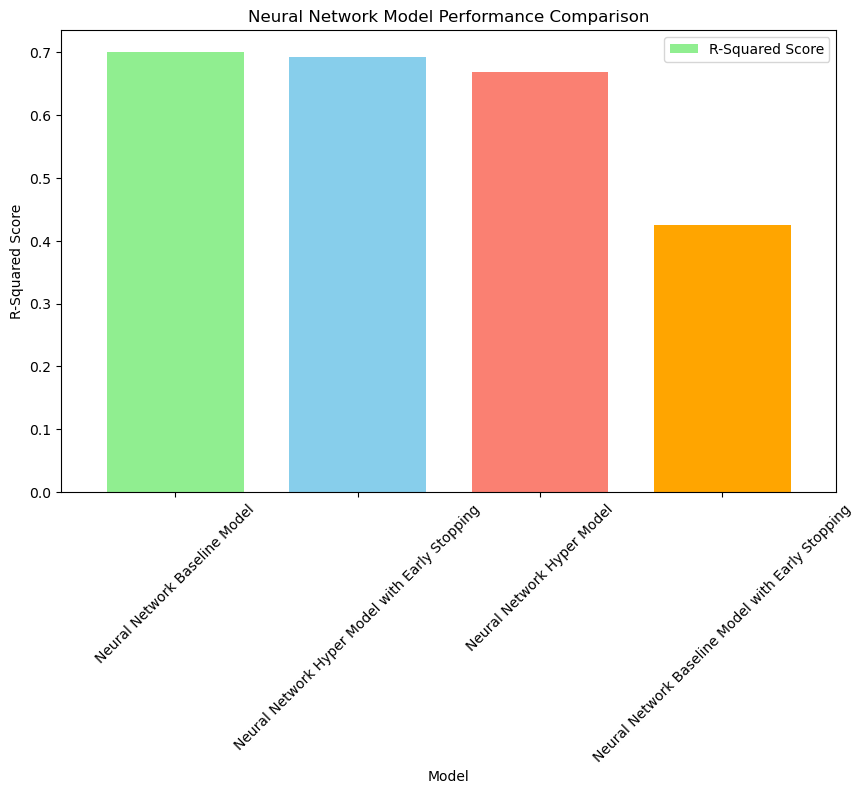

In [81]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_comparison_1 = nn_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_1 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_1, ax_nn_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_1 = nn_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_1,  # Apply different colors
    ax=ax_nn_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_1.set_title('Neural Network Model Performance Comparison')

# Rotate x-axis labels
ax_nn_1.set_xticklabels(ax_nn_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_1, labels_nn_1 = ax_nn_1.get_legend_handles_labels()
ax_nn_1.legend(lines_nn_1, labels_nn_1)

# Show the plot
plt.show()

In [82]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_comparison_1 = nn_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_model_name_1 = nn_comparison_1.iloc[0]['Model']
best_nn_model_1 = nn_comparison_1.iloc[0]['Model Object']
best_nn_r2_score_1 = nn_comparison_1.iloc[0]['R-Squared Score']
best_nn_rmse_1 = nn_comparison_1.iloc[0]['RMSE']
best_nn_mae_1 = nn_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_1 = best_nn_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_1)
print("The highest R-Squared Score is:", best_nn_r2_score_1)
print("The best RMSE is:", best_nn_rmse_1)
print("The best MAE is:", best_nn_mae_1)

The best model based on R-Squared Score is: Neural Network Baseline Model
The highest R-Squared Score is: 0.700766398516766
The best RMSE is: 758335.5955640574
The best MAE is: 285198.86416875


#### 3.1.6.2. Important Features

##### Features Filtering

In [83]:
# Select features above the mean importance
best_reg_mean_importance_1 = best_reg_features_1['Importance'].mean()
best_reg_selected_features_1 = best_reg_features_1[best_reg_features_1['Importance'] > best_reg_mean_importance_1]['Feature'].values


In [84]:
# Print selected_features
best_reg_selected_features_1

array(['SQUARE FEET', 'bus_station_accessibility', 'BATHS',
       'school_accessibility', 'transit_station_accessibility'],
      dtype=object)

In [85]:
# Reduce train and test sets to selected features
X_train_selected_1 = X_train_1[best_reg_selected_features_1]
X_test_selected_1 = X_test_1[best_reg_selected_features_1]

##### Expanded Features Filtering

In [86]:
# Filter out 'SQUARE FEET' from the DataFrame
best_reg_filtered_features_1 = best_reg_features_1[best_reg_features_1['Feature'] != 'SQUARE FEET']

# Calculate the average importance of the remaining features
best_reg_filtered_mean_importance_1 = best_reg_filtered_features_1['Importance'].mean()

# Select features above the mean importance
best_reg_filtered_selected_features_1 = best_reg_filtered_features_1[best_reg_filtered_features_1['Importance'] > best_reg_filtered_mean_importance_1]['Feature'].values


In [87]:
# Assuming best_reg_filtered_selected_features_1 is a numpy array
best_reg_filtered_selected_features_1 = np.append(best_reg_filtered_selected_features_1, "SQUARE FEET")

# Print the updated list of selected features
print(best_reg_filtered_selected_features_1)

['bus_station_accessibility' 'BATHS' 'school_accessibility'
 'transit_station_accessibility' 'preschool_accessibility'
 'park_accessibility' 'BEDS' 'SQUARE FEET']


In [88]:
# Reduce train and test sets to selected features
X_train_filtered_selected_1 = X_train_1[best_reg_filtered_selected_features_1]
X_test_filtered_selected_1 = X_test_1[best_reg_filtered_selected_features_1]

##### Baseline Model

In [89]:
# Initialize the neural network model
nn_filter_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_1.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_filter_model_1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Using Mean Squared Error for regression


In [90]:
# Train the model
nn_filter_history_1 = nn_filter_model_1.fit(X_train_filtered_selected_1, y_train_1, epochs=100, validation_split=0.1, batch_size=32)


Epoch 1/100
329/329 [==============================] - 2s 2ms/step - loss: 2596447977472.0000 - val_loss: 582269403136.0000
Epoch 2/100
329/329 [==============================] - 0s 1ms/step - loss: 1510918979584.0000 - val_loss: 444597567488.0000
Epoch 3/100
329/329 [==============================] - 0s 2ms/step - loss: 1492733919232.0000 - val_loss: 437195112448.0000
Epoch 4/100
329/329 [==============================] - 0s 1ms/step - loss: 1484820840448.0000 - val_loss: 429027786752.0000
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 1479790821376.0000 - val_loss: 467593363456.0000
Epoch 6/100
329/329 [==============================] - 0s 1ms/step - loss: 1471352406016.0000 - val_loss: 487530364928.0000
Epoch 7/100
329/329 [==============================] - 0s 2ms/step - loss: 1467585265664.0000 - val_loss: 448139264000.0000
Epoch 8/100
329/329 [==============================] - 0s 1ms/step - loss: 1455265021952.0000 - val_loss: 445973757952.0000
Epoch 9/

329/329 [==============================] - 0s 1ms/step - loss: 991286001664.0000 - val_loss: 344638160896.0000
Epoch 67/100
329/329 [==============================] - 0s 1ms/step - loss: 996273881088.0000 - val_loss: 401205755904.0000
Epoch 68/100
329/329 [==============================] - 0s 2ms/step - loss: 972508430336.0000 - val_loss: 478086561792.0000
Epoch 69/100
329/329 [==============================] - 0s 1ms/step - loss: 992966017024.0000 - val_loss: 379580743680.0000
Epoch 70/100
329/329 [==============================] - 0s 1ms/step - loss: 995334946816.0000 - val_loss: 341691858944.0000
Epoch 71/100
329/329 [==============================] - 0s 1ms/step - loss: 1007306670080.0000 - val_loss: 413805346816.0000
Epoch 72/100
329/329 [==============================] - 0s 1ms/step - loss: 966926532608.0000 - val_loss: 343728455680.0000
Epoch 73/100
329/329 [==============================] - 0s 1ms/step - loss: 979750813696.0000 - val_loss: 345804963840.0000
Epoch 74/100
329/329

In [91]:
# Evaluate the model on the test set
test_loss_nn_filter_1 = nn_filter_model_1.evaluate(X_test_filtered_selected_1, y_test_1)
print(f'Baseline Neural Network (Selected Features) Test Loss: {test_loss_nn_filter_1}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_filter_1 = nn_filter_model_1.predict(X_test_filtered_selected_1)
test_mse_nn_filter_1 = mean_squared_error(y_test_1, test_pred_nn_filter_1)
test_rmse_nn_filter_1 = np.sqrt(test_mse_nn_filter_1)
print(f'RMSE Score: {test_rmse_nn_filter_1}')
test_mae_nn_filter_1 = mean_absolute_error(y_test_1, test_pred_nn_filter_1)
print(f'MAE Score: {test_mae_nn_filter_1}')
test_r2_nn_filter_1 = r2_score(y_test_1, test_pred_nn_filter_1.flatten())
print(f'R2 Score: {test_r2_nn_filter_1}')

157/157 [==============================] - 0s 1ms/step - loss: 571568291840.0000
Baseline Neural Network (Selected Features) Test Loss: 571568291840.0
157/157 [==============================] - 0s 1ms/step
RMSE Score: 756021.3984244308
MAE Score: 299182.4340328125
R2 Score: 0.7025899418839255


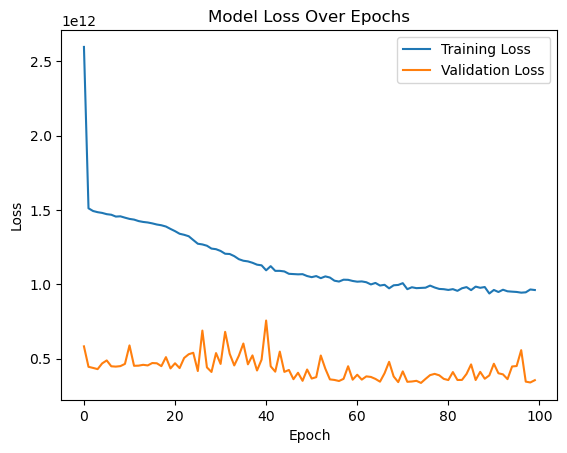

In [92]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_filter_1 = nn_filter_history_1.history['loss']
val_loss_nn_filter_1 = nn_filter_history_1.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_filter_1, label='Training Loss')
plt.plot(val_loss_nn_filter_1, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Neural Network Baseline Model with Early Stopping

In [93]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Setting random seeds to reduce the chance of variability in results
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

# Adjusted model architecture
nn_filter_early_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_1.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_filter_early_model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Early stopping callback
nn_filter_early_stopping_1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_filter_early_history_1 = nn_filter_early_model_1.fit(X_train_filtered_selected_1, y_train_1, validation_split=0.1, epochs=100, batch_size=32, callbacks=[nn_filter_early_stopping_1], verbose=1)

# Evaluate the model
test_loss_nn_filter_early_1 = nn_filter_early_model_1.evaluate(X_test_filtered_selected_1, y_test_1, verbose=0)


Epoch 1/100
329/329 [==============================] - 1s 2ms/step - loss: 3855407644672.0000 - val_loss: 2112032473088.0000
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 3834138329088.0000 - val_loss: 2082102312960.0000
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 3779775430656.0000 - val_loss: 2016771440640.0000
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 3682758819840.0000 - val_loss: 1913220759552.0000
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 3528010235904.0000 - val_loss: 1757809737728.0000
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 3334726483968.0000 - val_loss: 1586256674816.0000
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 3111287783424.0000 - val_loss: 1398119333888.0000
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 2889009332224.0000 - val_loss: 1215770525696.0000


In [94]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_filter_early_1 = nn_filter_early_model_1.predict(X_test_filtered_selected_1)

test_mse_nn_filter_early_1 = mean_squared_error(y_test_1, test_pred_nn_filter_early_1)
test_rmse_nn_filter_early_1 = np.sqrt(test_mse_nn_filter_early_1)
print(f'RMSE Score: {test_rmse_nn_filter_early_1}')
test_mae_nn_filter_early_1 = mean_absolute_error(y_test_1, test_pred_nn_filter_early_1)
print(f'RMSE Score: {test_mae_nn_filter_early_1}')
test_r2_nn_filter_early_1 = r2_score(y_test_1, test_pred_nn_filter_early_1.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_filter_early_1)

157/157 [==============================] - 0s 942us/step
RMSE Score: 1085950.7439302022
RMSE Score: 350396.104059375
Early Stopping Neural Network Model R2 Score: 0.386368380160787


##### Hyperparameter Tuning

In [95]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class NeuralNetworkHyperModel_filter_1(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_filter_model_1 = Sequential()
        nnht_filter_model_1.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_filter_model_1.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_filter_model_1.add(Dense(1))  # Output layer for regression
        
        nnht_filter_model_1.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_filter_model_1


In [96]:
# Check the shape of your input data
print("Shape of X_train_1:", X_train_1.shape)


Shape of X_train_1: (11664, 14)


In [97]:
from kerastuner.tuners import RandomSearch

nnht_filter_input_shape_1 = (X_train_filtered_selected_1.shape[1],)
nnht_filter_hypermodel_1 = NeuralNetworkHyperModel_filter_1(input_shape=nnht_filter_input_shape_1)

nnht_filter_tuner_1 = RandomSearch(
    nnht_filter_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_1g',
    project_name='nn_filter_hypertuning_keras_1g'
)

nnht_filter_tuner_1.search(X_train_filtered_selected_1, y_train_1, epochs=100, validation_split=0.1)


Trial 20 Complete [00h 01m 47s]
val_loss: 421932269568.0

Best val_loss So Far: 332060016640.0
Total elapsed time: 00h 37m 59s


In [98]:
nnht_filter_best_model_1 = nnht_filter_tuner_1.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_filter_1 = nnht_filter_best_model_1.evaluate(X_test_filtered_selected_1, y_test_1)
print(f'Best Neural Network Test Loss: {test_loss_nnht_1}')

# Predict and calculate R² Score
test_pred_nnht_filter_1 = nnht_filter_best_model_1.predict(X_test_filtered_selected_1)
test_rmse_nnht_filter_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_filter_1))
test_mae_nnht_filter_1 = mean_absolute_error(y_test_1, test_pred_nnht_filter_1)
test_r2_nnht_filter_1 = r2_score(y_test_1, test_pred_nnht_filter_1.flatten())

print(f'RMSE: {test_rmse_nnht_filter_1}')
print(f'MAE: {test_mae_nnht_filter_1}')
print(f'R2 Score: {test_r2_nnht_filter_1}')


157/157 [==============================] - 0s 1ms/step - loss: 649264168960.0000
Best Neural Network Test Loss: 637650796544.0
157/157 [==============================] - 0s 1ms/step
RMSE: 805769.3815281816
MAE: 299729.722503125
R2 Score: 0.6621616112564147


##### Hyper Model with Early Stopping 

In [99]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_filter_early_stopping_1 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [100]:
# Setup your tuner
nnht_filter_early_tuner_1 = RandomSearch(
    nnht_filter_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_early_1g',
    project_name='nn_filter_hypertuning_earlystopping_keras_1g'
)

Reloading Tuner from nnht_filter_early_1g\nn_filter_hypertuning_earlystopping_keras_1g\tuner0.json


In [101]:
# Start the search and include early stopping
nnht_filter_early_tuner_1.search(
    X_train_filtered_selected_1, 
    y_train_1, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_filter_early_stopping_1]
)

Trial 20 Complete [00h 00m 14s]
val_loss: 417518223360.0

Best val_loss So Far: 337739923456.0
Total elapsed time: 00h 07m 27s


In [102]:
# Retrieve and evaluate the best model
nnht_filter_early_best_model_1 = nnht_filter_early_tuner_1.get_best_models(num_models=1)[0]
test_loss_nnht_filter_early_1 = nnht_filter_early_best_model_1.evaluate(X_test_filtered_selected_1, y_test_1)
test_pred_nnht_filter_early_1 = nnht_filter_early_best_model_1.predict(X_test_filtered_selected_1)
test_rmse_nnht_filter_early_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_filter_early_1))
test_mae_nnht_filter_early_1 = mean_absolute_error(y_test_1, test_pred_nnht_filter_early_1)
test_r2_nnht_filter_early_1 = r2_score(y_test_1, test_pred_nnht_filter_early_1.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_filter_early_1}')
print(f'RMSE: {test_rmse_nnht_filter_early_1}')
print(f'MAE: {test_mae_nnht_filter_early_1}')
print(f'R2 Score: {test_r2_nnht_filter_early_1}')

157/157 [==============================] - 0s 1ms/step
Best Neural Network Test Loss: 720081715200.0
RMSE: 848576.3895417663
MAE: 305986.513675
R2 Score: 0.6253123627373763


##### Comparison

In [103]:
# Displaying the comparison through a table

nn_filter_comparison_1 = {
    'Model': ['Neural Network (Filtered Features) Baseline Model', 'Neural Network (Filtered Features) Baseline Model with Early Stopping', 'Neural Network (Filtered Features) Hyper Model', 'Neural Network (Filtered Features) Hyper Model with Early Stopping'],
    'Model Object': [nn_filter_model_1, nn_filter_early_model_1, nnht_filter_best_model_1, nnht_filter_early_best_model_1],
    'RMSE': [test_rmse_nn_filter_1, test_rmse_nn_filter_early_1, test_rmse_nnht_filter_1, test_rmse_nnht_filter_early_1],
    'MAE': [test_mae_nn_filter_1, test_mae_nn_filter_early_1, test_mae_nnht_filter_1, test_mae_nnht_filter_early_1],
    'R-Squared Score': [test_r2_nn_filter_1, test_r2_nn_filter_early_1, test_r2_nnht_filter_1, test_r2_nnht_filter_early_1]
}

nn_filter_comparison_1 = pd.DataFrame(nn_filter_comparison_1)

nn_filter_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,Neural Network (Filtered Features) Baseline Model,<keras.src.engine.sequential.Sequential object...,7.560214e+05,299182.434033,0.702590
2,Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,8.057694e+05,299729.722503,0.662162
3,Neural Network (Filtered Features) Hyper Model...,<keras.src.engine.sequential.Sequential object...,8.485764e+05,305986.513675,0.625312
1,Neural Network (Filtered Features) Baseline Mo...,<keras.src.engine.sequential.Sequential object...,1.085951e+06,350396.104059,0.386368


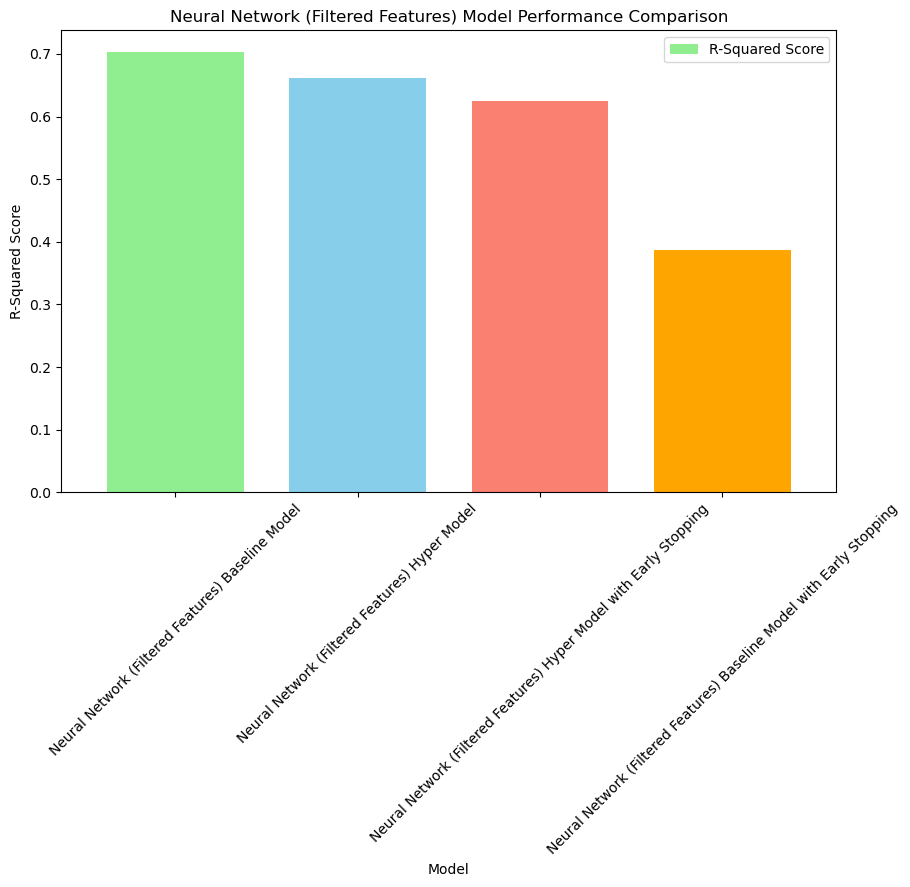

In [104]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_filter_comparison_1 = nn_filter_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_filter_1 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_filter_1, ax_nn_filter_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_filter_1 = nn_filter_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_filter_1,  # Apply different colors
    ax=ax_nn_filter_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_filter_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_filter_1.set_title('Neural Network (Filtered Features) Model Performance Comparison')

# Rotate x-axis labels
ax_nn_filter_1.set_xticklabels(ax_nn_filter_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_filter_1, labels_nn_filter_1 = ax_nn_filter_1.get_legend_handles_labels()
ax_nn_filter_1.legend(lines_nn_filter_1, labels_nn_filter_1)

# Show the plot
plt.show()

In [105]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_filter_comparison_1 = nn_filter_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_filter_model_name_1 = nn_filter_comparison_1.iloc[0]['Model']
best_nn_filter_model_1 = nn_filter_comparison_1.iloc[0]['Model Object']
best_nn_filter_r2_score_1 = nn_filter_comparison_1.iloc[0]['R-Squared Score']
best_nn_filter_rmse_1 = nn_filter_comparison_1.iloc[0]['RMSE']
best_nn_filter_mae_1 = nn_filter_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_filter_1 = best_nn_filter_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_filter_1)
print("The highest R-Squared Score is:", best_nn_filter_r2_score_1)
print("The best RMSE is:", best_nn_filter_rmse_1)
print("The best MAE is:", best_nn_filter_mae_1)

The best model based on R-Squared Score is: Neural Network (Filtered Features) Baseline Model
The highest R-Squared Score is: 0.7025899418839255
The best RMSE is: 756021.3984244308
The best MAE is: 299182.4340328125


#### 3.1.6.3. Neural Network Model Comparison

In [106]:
# Displaying the comparison through a table

nn_all_comparison_1 = {
    'Model': [best_nn_model_name_1, best_nn_filter_model_name_1],
    'Model Object': [best_nn_model_1, best_nn_filter_model_1],
    'RMSE': [best_nn_rmse_1, best_nn_filter_rmse_1],
    'MAE': [best_nn_mae_1, best_nn_filter_mae_1],
    'R-Squared Score': [best_nn_r2_score_1, best_nn_filter_r2_score_1]
}

nn_all_comparison_1 = pd.DataFrame(nn_all_comparison_1)

nn_all_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,Neural Network (Filtered Features) Baseline Model,<keras.src.engine.sequential.Sequential object...,756021.398424,299182.434033,0.702590
0,Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,758335.595564,285198.864169,0.700766


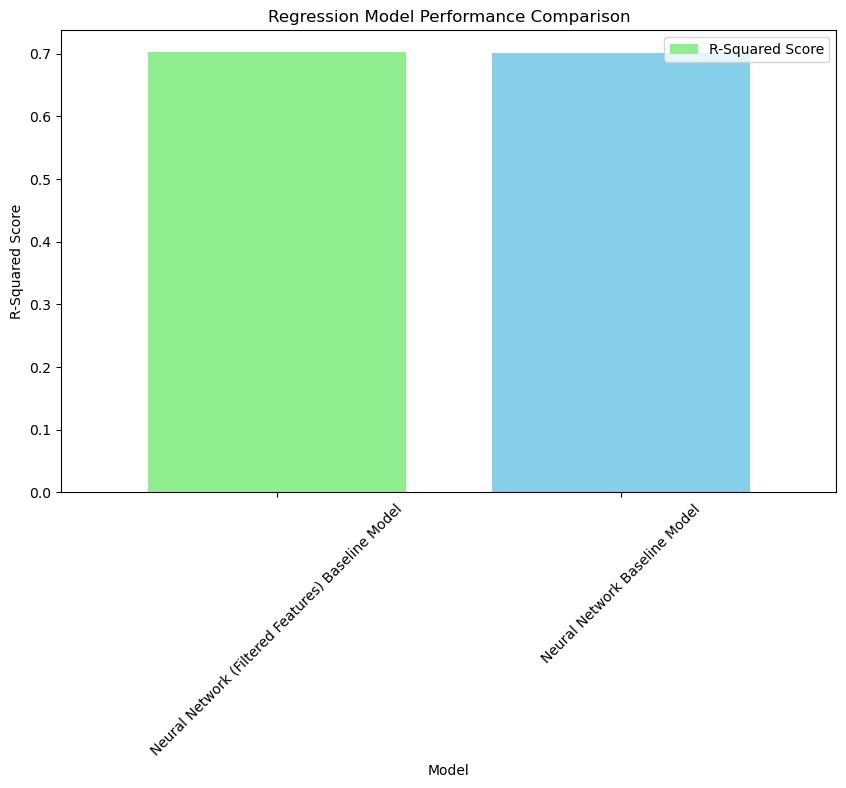

In [107]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_all_comparison_1 = nn_all_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_all_1 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_nn_all_1, ax_nn_all_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_all_1 = nn_all_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_all_1,  # Apply different colors
    ax=ax_nn_all_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_all_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_all_1.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_nn_all_1.set_xticklabels(ax_nn_all_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_all_1, labels_nn_all_1 = ax_nn_all_1.get_legend_handles_labels()
ax_nn_all_1.legend(lines_nn_all_1, labels_nn_all_1)

# Show the plot
plt.show()

In [108]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_all_comparison_1 = nn_all_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_all_model_name_1 = nn_all_comparison_1.iloc[0]['Model']
best_nn_all_model_1 = nn_all_comparison_1.iloc[0]['Model Object']
best_nn_all_r2_score_1 = nn_all_comparison_1.iloc[0]['R-Squared Score']
best_nn_all_rmse_1 = nn_all_comparison_1.iloc[0]['RMSE']
best_nn_all_mae_1 = nn_all_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_all_1 = best_nn_all_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_all_1)
print("The highest R-Squared Score is:", best_nn_all_r2_score_1)
print("The best RMSE is:", best_nn_all_rmse_1)
print("The best MAE is:", best_nn_all_mae_1)

The best model based on R-Squared Score is: Neural Network (Filtered Features) Baseline Model
The highest R-Squared Score is: 0.7025899418839255
The best RMSE is: 756021.3984244308
The best MAE is: 299182.4340328125


#### 3.1.6.4. Neural Network Feature Importance

In [109]:
# # Check the model input expectation
# print("Model input shape:", best_nn_all_model_1.input_shape)
# print("Background data shape:", best_nn_all_background_1.shape)

In [110]:
# import shap

# # Create a background dataset (can be a small random sample of the training set)
# background = X_train_1.iloc[:100].values  # Adjust the slice size as needed

# # KernelExplainer works with any model, as it uses a model-agnostic approach
# explainer = shap.KernelExplainer(nnht_best_model_1.predict, shap.sample(X_train_1, 100))  # Using a sample of the training data as background
# shap_values = explainer.shap_values(X_test_1[:100], nsamples=100)  # You can adjust the number of samples

# # Summary plot for the subset of features
# shap.summary_plot(shap_values, X_test_1[:100], feature_names=X_test_1.columns[:100])

In [111]:
# # Summary plot for the subset of features
# shap.summary_plot(shap_values, X_test_1[:100], feature_names=X_test_1.columns[:100])

### 3.1.7. All Model Comparison

In [112]:
# Displaying the comparison through a table

model_comparison_1 = {
    'Model': [best_reg_model_name_1, best_nn_all_model_name_1],
    'Model Object': [best_reg_model_1, best_nn_all_model_1],
    'RMSE': [best_reg_rmse_1, best_nn_all_rmse_1],
    'MAE': [best_reg_mae_1, best_nn_all_mae_1],
    'R-Squared Score': [best_reg_r2_score_1, best_nn_all_r2_score_1]
}

model_comparison_1 = pd.DataFrame(model_comparison_1)

model_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",728871.977300,162993.032301,0.723567
1,Neural Network (Filtered Features) Baseline Model,<keras.src.engine.sequential.Sequential object...,756021.398424,299182.434033,0.702590


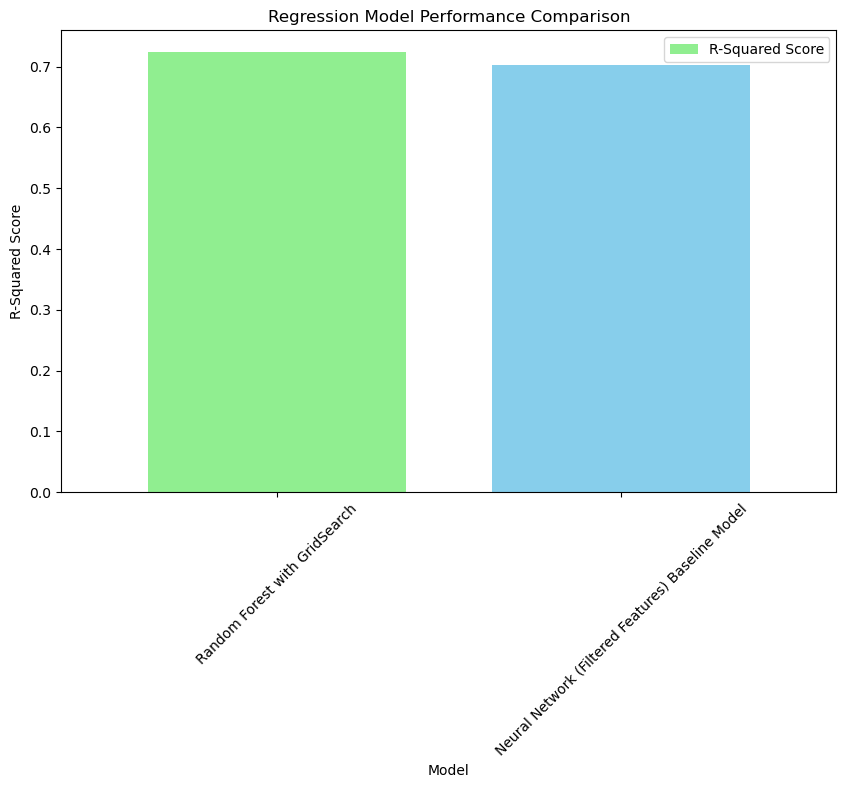

In [113]:
# Sort the DataFrame by 'R-Squared Score' in descending order
model_comparison_1 = model_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_model_1 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_model_1, ax_model_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_model_1 = model_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_model_1,  # Apply different colors
    ax=ax_model_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_model_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_model_1.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_model_1.set_xticklabels(ax_model_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_model_1, labels_model_1 = ax_model_1.get_legend_handles_labels()
ax_model_1.legend(lines_model_1, labels_model_1)

# Show the plot
plt.show()

In [114]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
model_comparison_1 = model_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_model_name_1 = model_comparison_1.iloc[0]['Model']
best_model_1 = model_comparison_1.iloc[0]['Model Object']
best_r2_score_1 = model_comparison_1.iloc[0]['R-Squared Score']
best_rmse_1 = model_comparison_1.iloc[0]['RMSE']
best_mae_1 = model_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_model_name__1 = best_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_model_name__1)
print("The highest R-Squared Score is:", best_r2_score_1)
print("The best RMSE is:", best_rmse_1)
print("The best MAE is:", best_mae_1)

The best model based on R-Squared Score is: Random Forest with GridSearch
The highest R-Squared Score is: 0.7235669390651731
The best RMSE is: 728871.9772998668
The best MAE is: 162993.03230100474


# 4. All Version Comparison

## 4.1. All Models

In [115]:
all_model_1 = pd.concat([linreg_comparison_1,
                       xgb_comparison_1,
                       rf_comparison_1,
                       nn_comparison_1,
                       nn_filter_comparison_1], ignore_index=True)

all_model_1 = all_model_1.sort_values('R-Squared Score', ascending=False)

all_model_1

,Model,Model Object,RMSE,MAE,R-Squared Score
8,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",7.288720e+05,162993.032301,0.723567
9,Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",7.472741e+05,194532.237723,0.709432
14,Neural Network (Filtered Features) Baseline Model,<keras.src.engine.sequential.Sequential object...,7.560214e+05,299182.434033,0.702590
10,Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,7.583356e+05,285198.864169,0.700766
11,Neural Network Hyper Model with Early Stopping,<keras.src.engine.sequential.Sequential object...,7.685465e+05,297187.251972,0.692654
12,Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,7.985305e+05,291829.474538,0.668205
15,Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,8.057694e+05,299729.722503,0.662162
5,XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",8.251762e+05,252846.379280,0.645692
6,XGBoost with RandomizedSearch,"XGBRegressor(base_score=None, booster=None, ca...",8.259624e+05,241427.438872,0.645017
7,XGBoost Baseline Model,"XGBRegressor(base_score=None, booster=None, ca...",8.326502e+05,187907.865773,0.639245


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


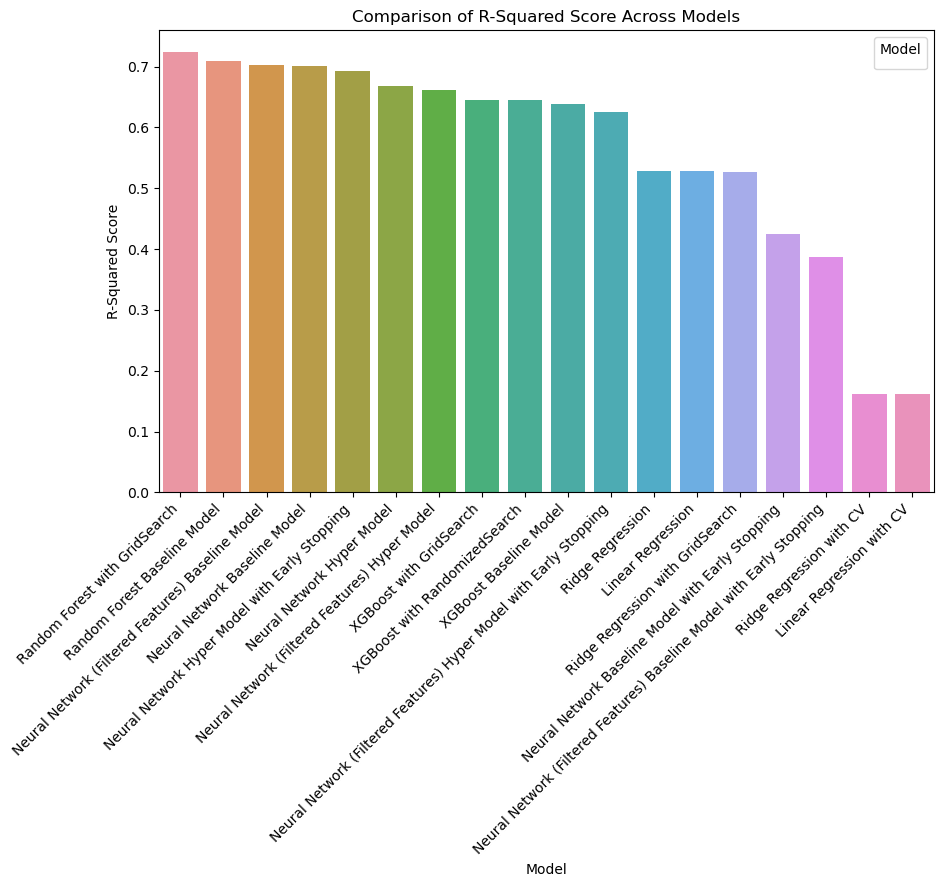

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model_comparison is correctly defined with columns 'Model' and 'R-Squared Score'
fig_model, ax_model = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Plotting R-Squared Score
sns.barplot(x='Model', y='R-Squared Score', data=all_model_1, ax=ax_model)
ax_model.set_title('Comparison of R-Squared Score Across Models')
ax_model.set_ylabel('R-Squared Score')
ax_model.set_xlabel('Model')

# Handling legend if necessary (may be redundant if 'hue' is the same as 'x')
ax_model.legend(title='Model')

# Rotate x-axis labels for better visibility
ax_model.set_xticklabels(ax_model.get_xticklabels(), rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.show()


## 4.2. Model Type Comparison

In [117]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_linreg = linreg_comparison_1['RMSE'].mean()
average_mae_linreg = linreg_comparison_1['MAE'].mean()
average_r_squared_linreg = linreg_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_linreg:.4f}")
print(f"Average MAE: {average_mae_linreg:.4f}")
print(f"Average R-Squared Score: {average_r_squared_linreg:.4f}")

Average RMSE: 949910.8471
Average MAE: 72103.8129
Average R-Squared Score: 0.3815


In [118]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_xgb = xgb_comparison_1['RMSE'].mean()
average_mae_xgb = xgb_comparison_1['MAE'].mean()
average_r_squared_xgb = xgb_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_xgb:.4f}")
print(f"Average MAE: {average_mae_xgb:.4f}")
print(f"Average R-Squared Score: {average_r_squared_xgb:.4f}")

Average RMSE: 827929.6337
Average MAE: 227393.8946
Average R-Squared Score: 0.6433


In [119]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_rf = rf_comparison_1['RMSE'].mean()
average_mae_rf = rf_comparison_1['MAE'].mean()
average_r_squared_rf = rf_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_rf:.4f}")
print(f"Average MAE: {average_mae_rf:.4f}")
print(f"Average R-Squared Score: {average_r_squared_rf:.4f}")

Average RMSE: 738073.0631
Average MAE: 178762.6350
Average R-Squared Score: 0.7165


In [120]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_nn = nn_comparison_1['RMSE'].mean()
average_mae_nn = nn_comparison_1['MAE'].mean()
average_r_squared_nn = nn_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_nn:.4f}")
print(f"Average MAE: {average_mae_nn:.4f}")
print(f"Average R-Squared Score: {average_r_squared_nn:.4f}")

Average RMSE: 844150.3827
Average MAE: 313986.5963
Average R-Squared Score: 0.6217


In [121]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_nn_filter = nn_filter_comparison_1['RMSE'].mean()
average_mae_nn_filter = nn_filter_comparison_1['MAE'].mean()
average_r_squared_nn_filter = nn_filter_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_nn_filter:.4f}")
print(f"Average MAE: {average_mae_nn_filter:.4f}")
print(f"Average R-Squared Score: {average_r_squared_nn_filter:.4f}")

Average RMSE: 874079.4784
Average MAE: 313823.6936
Average R-Squared Score: 0.5941


In [122]:
# Displaying the comparison through a table

average_by_model = {
    'Model': ['Linear & Ridge Models', 'XGBoost Models', 'RandomForest Models', 'Neural Network (NN) Models', 'Filtered Feature NN Model'],
    'RMSE': [average_rmse_linreg, average_rmse_xgb, average_rmse_rf, average_rmse_nn, average_rmse_nn_filter],
    'MAE': [average_mae_linreg, average_mae_xgb, average_mae_rf, average_mae_nn, average_mae_nn_filter],
    'R-Squared Score': [average_r_squared_linreg, average_r_squared_xgb, average_r_squared_rf, average_r_squared_nn, average_r_squared_nn_filter]
}

average_by_model = pd.DataFrame(average_by_model)

average_by_model.sort_values(['R-Squared Score'], ascending=[False])


,Model,RMSE,MAE,R-Squared Score
2,RandomForest Models,738073.063068,178762.635012,0.716500
1,XGBoost Models,827929.633719,227393.894642,0.643318
3,Neural Network (NN) Models,844150.382699,313986.596339,0.621662
4,Filtered Feature NN Model,874079.478356,313823.693568,0.594108
0,Linear & Ridge Models,949910.847087,72103.812947,0.381518


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


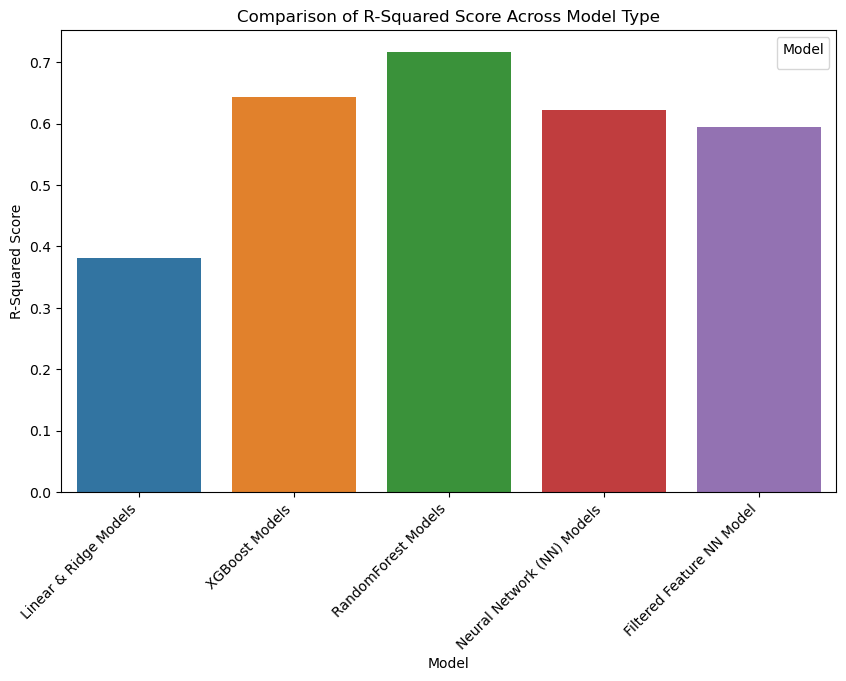

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model_comparison is correctly defined with columns 'Model' and 'R-Squared Score'
fig_model_type, ax_model_type = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Plotting R-Squared Score
sns.barplot(x='Model', y='R-Squared Score', data=average_by_model, ax=ax_model_type)
ax_model_type.set_title('Comparison of R-Squared Score Across Model Type')
ax_model_type.set_ylabel('R-Squared Score')
ax_model_type.set_xlabel('Model')

# Handling legend if necessary (may be redundant if 'hue' is the same as 'x')
ax_model_type.legend(title='Model')

# Rotate x-axis labels for better visibility
ax_model_type.set_xticklabels(ax_model_type.get_xticklabels(), rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.show()


# 5. Creating an Estimator

In [124]:
# # Define the function with appropriate debug statements
# def predict_house_price_with_interval(model, scaler, feature_values, target_scaler, percentile=95):
#     try:
#         # Convert feature values into DataFrame
#         input_features = pd.DataFrame(feature_values)
        
#         # Check if all expected columns are present
#         if not set(input_features.columns).issubset(set(scaler.feature_names_in_)):
#             missing_cols = set(scaler.feature_names_in_) - set(input_features.columns)
#             raise ValueError(f"Missing columns: {missing_cols}")
        
#         # Scale the features
#         input_features_scaled = scaler.transform(input_features)
        
#         # Use the Random Forest's built-in method to get predictions from each tree
#         preds_scaled = np.array([tree.predict(input_features_scaled.reshape(1, -1)) for tree in model.estimators_])
        
#         # Reverse scaling for the target variable
#         preds = target_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()
        
#         # Calculate the mean prediction
#         mean_prediction = np.mean(preds)
        
#         # Calculate the percentiles to form the prediction interval
#         lower_bound = np.percentile(preds, (100 - percentile) / 2.)
#         upper_bound = np.percentile(preds, 100 - (100 - percentile) / 2.)
        
#         return mean_prediction, lower_bound, upper_bound
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         return None, None, None


In [125]:
# # Feature names ordered as expected by the model (ensure this order matches your training data)
# feature_names = [
#     'BEDS', 'BATHS', 'SQUARE FEET', 'AGE', 'gas_station_accessibility', 
#     'parking_accessibility', 'airport_accessibility', 'bus_station_accessibility', 
#     'ferry_terminal_accessibility', 'light_rail_station_accessibility', 
#     'train_station_accessibility', 'transit_station_accessibility', 
#     'transportation_others_accessibility', 'library_accessibility', 
#     'preschool_accessibility', 'school_accessibility', 'university_accessibility', 
#     'amusement_center_accessibility', 'community_center_accessibility', 
#     'entertainment_accessibility', 'park_accessibility', 'bar_accessibility', 
#     'cafe_and_bakery_accessibility', 'food_others_accessibility', 
#     'restaurant_accessibility', 'health_store_accessibility', 
#     'hospital_accessibility', 'places_of_worship_accessibility', 
#     'safety_accessibility', 'stores_essentials_accessibility', 
#     'stores_others_accessibility'
# ]

In [126]:
# import pandas as pd

# # Example input features for prediction
# feature_values = {
#     'BEDS': [3],
#     'BATHS': [2.0],
#     'SQUARE FEET': [1720],
#     'AGE': [51],
#     'gas_station_accessibility': [1.1],
#     'parking_accessibility': [3.1],
#     'airport_accessibility': [0.0],
#     'bus_station_accessibility': [20.2],
#     'ferry_terminal_accessibility': [0.0],
#     'light_rail_station_accessibility': [5.0],
#     'train_station_accessibility': [5.0],
#     'transit_station_accessibility': [20.0],
#     'transportation_others_accessibility': [5.0],
#     'library_accessibility': [10.0],
#     'preschool_accessibility': [10.0],
#     'school_accessibility': [24.5],
#     'university_accessibility': [1.0],
#     'amusement_center_accessibility': [1.0],
#     'community_center_accessibility': [5.0],
#     'entertainment_accessibility': [25.0],
#     'park_accessibility': [10.0],
#     'bar_accessibility': [5.0],
#     'cafe_and_bakery_accessibility': [5.0],
#     'food_others_accessibility': [5.0],
#     'restaurant_accessibility': [14.5],
#     'health_store_accessibility': [2.0],
#     'hospital_accessibility': [1.0],
#     'places_of_worship_accessibility': [5.0],
#     'safety_accessibility': [0.5],
#     'stores_essentials_accessibility': [3.5],
#     'stores_others_accessibility': [19.0]
# }




In [127]:
# # Now X_train_1 should not have 'PRICE' and you can fit the scaler
# feature_scaler_1 = StandardScaler()
# feature_scaler_1.fit(X_train_1)  # Fit scaler to the training features

# # Scale the features
# X_train_1_scaled = feature_scaler_1.transform(X_train_1)
# X_test_1_scaled = feature_scaler_1.transform(X_test_1)

# # If you're scaling the target, ensure y_train is reshaped for compatibility with StandardScaler
# target_scaler_1 = StandardScaler()
# y_train_1_scaled = target_scaler_1.fit_transform(y_train_1.values.reshape(-1, 1))

# # Assuming 'target_scaler' is an instance of StandardScaler for the target variable
# # Example of using the function
# # Now let's attempt to make a prediction
# predicted_price, lower_price, upper_price = predict_house_price_with_interval(
#     rf_model_1, feature_scaler_1, feature_values, target_scaler_1)

# if predicted_price is not None:
#     print(f"Estimated House Price Range: ${lower_price:,.2f} - ${upper_price:,.2f} (Mean: ${predicted_price:,.2f})")
# else:
#     print("Failed to make prediction.")
